In [ ]:
!pip install biopython pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 15.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Code for AAC Feature Extraction

In [ ]:
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd

# Function to calculate Amino Acid Composition (AAC)
def calculate_aac(sequence):
    analysed_seq = ProteinAnalysis(str(sequence))
    aac = analysed_seq.get_amino_acids_percent()
    return aac

# Function to process a FASTA file and extract AAC features for each sequence
def process_fasta_aac(fasta_path, output_csv):
    # Initialize a list to store AAC features for each sequence
    aac_data = []

    # Parse the FASTA file and extract AAC for each sequence
    for record in SeqIO.parse(fasta_path, "fasta"):
        aac = calculate_aac(record.seq)
        aac_data.append(aac)  # Append AAC features to the list

    # Create the DataFrame from the list of AAC features
    aac_df = pd.DataFrame(aac_data)

    # Save the AAC features to a CSV file
    aac_df.to_csv(output_csv, index=False)
    print(f"Saved AAC features to {output_csv}")

# Paths for input FASTA files
main_p = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/POSITIVE_main (2).fasta"        # Path for main positive FASTA file
main_n = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/NEGATIVE_main (2).fasta"        # Path for main negative FASTA file
validation_p = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/POSITIVE_validation (2).fasta"  # Path for validation positive FASTA file
validation_n = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/NEGATIVE_validation (2).fasta"  # Path for validation negative FASTA file

# Output paths for AAC feature CSV files
output_main_p = "aac_main_positive.csv"
output_main_n = "aac_main_negative.csv"
output_validation_p = "aac_validation_positive.csv"
output_validation_n = "aac_validation_negative.csv"

# Apply AAC feature extraction and save to CSV for each dataset
process_fasta_aac(main_p, output_main_p)         # Main positive
process_fasta_aac(main_n, output_main_n)         # Main negative
process_fasta_aac(validation_p, output_validation_p)  # Validation positive
process_fasta_aac(validation_n, output_validation_n)  # Validation negative

/usr/local/lib/python3.11/dist-packages/Bio/SeqUtils/ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method has been deprecated and will likely be removed from Biopython in the near future. Please use the amino_acids_percent attribute instead.
  warnings.warn(


Saved AAC features to aac_main_positive.csv
Saved AAC features to aac_main_negative.csv
Saved AAC features to aac_validation_positive.csv
Saved AAC features to aac_validation_negative.csv


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


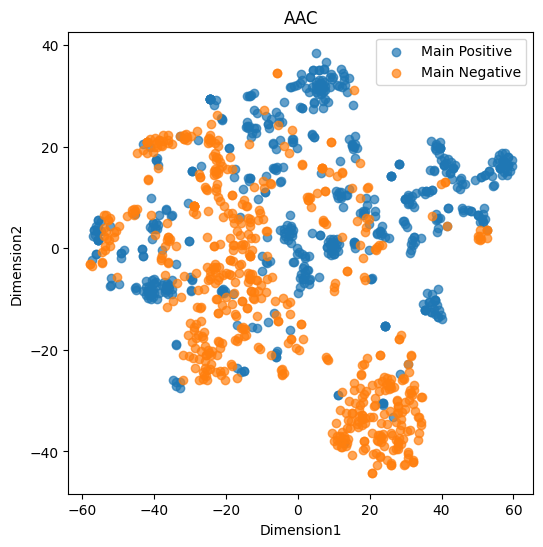

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load AAC features for the main dataset
main_positive = pd.read_csv("aac_main_positive.csv")
main_negative = pd.read_csv("aac_main_negative.csv")

# Add labels for the main dataset
main_positive["label"] = "Main Positive"
main_negative["label"] = "Main Negative"

# Combine main datasets into one DataFrame
main_data = pd.concat([main_positive, main_negative])

# Separate features and labels
features = main_data.drop(columns=["label"])  # Drop the label column
labels = main_data["label"]  # Keep the label column

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(features)

# Add t-SNE results back to DataFrame
main_data["t-SNE-1"] = tsne_results[:, 0]
main_data["t-SNE-2"] = tsne_results[:, 1]

# Plot the t-SNE results for main dataset
plt.figure(figsize=(6, 6))
for label in main_data["label"].unique():
    subset = main_data[main_data["label"] == label]
    plt.scatter(subset["t-SNE-1"], subset["t-SNE-2"], label=label, alpha=0.7)

plt.title("AAC")
plt.xlabel("Dimension1")
plt.ylabel("Dimension2")
plt.legend()
plt.show()


In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install pydot graphviz


# **ALL MODEL**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_negative (2).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_positive (1).csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_negative (1).csv")


In [ ]:
# Label the datasets
main_p['label'] = 1
main_n['label'] = 0
validation_p['label'] = 1
validation_n['label'] = 0

# Combine datasets
train_data = pd.concat([main_p, main_n], ignore_index=True)
val_data = pd.concat([validation_p, validation_n], ignore_index=True)

# Separate features and labels
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
X_val = val_data.drop(columns=['label']).values
y_val = val_data['label'].values


In [ ]:
# Dictionary of models
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "MLP": Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the neural network models
models["Neural Network"].compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
models["MLP"].compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Store accuracies
results = []

# Train each model and evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name in ["Neural Network", "MLP"]:
        # Neural Network training
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        train_pred = (model.predict(X_train) > 0.5).astype("int32")
        val_pred = (model.predict(X_val) > 0.5).astype("int32")
    else:
        # Traditional ML model training
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

    # Calculate train and validation accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_val, val_pred)

    results.append({"Model": name, "Train Accuracy": train_accuracy, "Validation Accuracy": val_accuracy})


Training SVM...

Training Decision Tree...

Training Random Forest...

Training Logistic Regression...

Training k-NN...

Training Naive Bayes...

Training Gradient Boosting...

Training XGBoost...

Training LightGBM...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:58:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training CatBoost...

Training AdaBoost...

Training Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Training MLP...
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Convert to DataFrame and sort by Validation Accuracy and Train Accuracy in descending order
results_df = pd.DataFrame(results).sort_values(by=["Validation Accuracy", "Train Accuracy"], ascending=False).reset_index(drop=True)

# Display results
print("\nModel Accuracy Table (Descending Order of Validation Accuracy)")
print(results_df)


Model Accuracy Table (Descending Order of Validation Accuracy)
                  Model  Train Accuracy  Validation Accuracy
0                   MLP        0.995704             0.910000
1               XGBoost        0.995704             0.906667
2              LightGBM        0.995704             0.903333
3         Random Forest        0.995704             0.900000
4        Neural Network        0.993986             0.900000
5              CatBoost        0.989691             0.893333
6     Gradient Boosting        0.951031             0.886667
7         Decision Tree        0.995704             0.863333
8                  k-NN        0.936426             0.860000
9              AdaBoost        0.879725             0.840000
10  Logistic Regression        0.784364             0.783333
11                  SVM        0.779210             0.776667
12          Naive Bayes        0.710481             0.703333


In [ ]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_auc_score, accuracy_score

# Store evaluation metrics
results = []

# Train each model and evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name in ["Neural Network", "MLP"]:
        # Neural Network training
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        train_pred = (model.predict(X_train) > 0.5).astype("int32").flatten()
        val_pred = (model.predict(X_val) > 0.5).astype("int32").flatten()
    else:
        # Traditional ML model training
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

    # Calculate metrics for validation set
    val_accuracy = accuracy_score(y_val, val_pred)
    val_cm = confusion_matrix(y_val, val_pred)
    tn, fp, fn, tp = val_cm.ravel()

    # Metrics
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall/TPR
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # TNR
    mcc = matthews_corrcoef(y_val, val_pred)
    kappa = cohen_kappa_score(y_val, val_pred)
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]) if name not in ["Neural Network", "MLP"] else roc_auc_score(y_val, model.predict(X_val).flatten())

    # Append results
    results.append({
        "Model": name,
        "Accuracy": val_accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "MCC": mcc,
        "Kappa": kappa,
        "AUC": auc
    })

# Convert to DataFrame and sort by AUC
results_df = pd.DataFrame(results).sort_values(by=["AUC"], ascending=False).reset_index(drop=True)

# Display results
print("\nModel Performance Metrics")
print(results_df)



Training SVM...

Training Decision Tree...

Training Random Forest...

Training Logistic Regression...

Training k-NN...

Training Naive Bayes...

Training Gradient Boosting...

Training XGBoost...

Training LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training CatBoost...

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Training Neural Network...
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Training MLP...
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Model Performance Metrics
                  Model  Accuracy  Sensitivity  Specificity       MCC  \
0               XGBoost  0.906667     0.926667     0.886667  0.813985   
1              LightGBM  0.903333     0.920000     0.886667  0.807115   
2         Random Forest  0.910000     0.926667     0.893333  0.820456   
3              CatBoost  0.893333     0.926667     0.860000  0.788421   
4                   MLP  0.903333     0.920000     0.886667  0.807115   
5        Neural Network  0.910000     0.953333     0.866667  0.823097   
6     Gradient Boosting  0.886667     0.920000     0.853333  0.775058   
7                  k-NN  0.860000     0.913333     0.806667  0.724131   
8              AdaBoost  0.84000

# **Cross-Validation ( K-folf 5)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_auc_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Models dictionary
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
}

# Neural Network models
def create_neural_network(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_mlp(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store all results
results = []

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_probs):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics calculations
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_probs)

    return accuracy, sensitivity, specificity, mcc, kappa, auc

# Cross-validation for traditional ML models
for name, model in models.items():
    print(f"\nPerforming Cross-validation for {name}...")
    accuracies, sensitivities, specificities, mccs, kappas, aucs = [], [], [], [], [], []

    for train_index, val_index in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold)
        y_probs = model.predict_proba(X_val_fold)[:, 1]  # Probabilities for positive class
        y_pred = (y_probs > 0.5).astype(int)

        # Calculate metrics
        metrics = calculate_metrics(y_val_fold, y_pred, y_probs)
        accuracies.append(metrics[0])
        sensitivities.append(metrics[1])
        specificities.append(metrics[2])
        mccs.append(metrics[3])
        kappas.append(metrics[4])
        aucs.append(metrics[5])

    # Store mean metrics
    results.append({
        "Model": name,
        "Accuracy": np.mean(accuracies),
        "Sensitivity": np.mean(sensitivities),
        "Specificity": np.mean(specificities),
        "MCC": np.mean(mccs),
        "Kappa": np.mean(kappas),
        "AUC": np.mean(aucs),
    })

# Cross-validation for Neural Networks
for name, create_model in [("Neural Network", create_neural_network), ("MLP", create_mlp)]:
    print(f"\nPerforming Cross-validation for {name}...")
    accuracies, sensitivities, specificities, mccs, kappas, aucs = [], [], [], [], [], []

    for train_index, val_index in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Create and train the model
        model = create_model(X_train.shape[1])
        model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

        y_probs = model.predict(X_val_fold).flatten()
        y_pred = (y_probs > 0.5).astype(int)

        # Calculate metrics
        metrics = calculate_metrics(y_val_fold, y_pred, y_probs)
        accuracies.append(metrics[0])
        sensitivities.append(metrics[1])
        specificities.append(metrics[2])
        mccs.append(metrics[3])
        kappas.append(metrics[4])
        aucs.append(metrics[5])

    # Store mean metrics
    results.append({
        "Model": name,
        "Accuracy": np.mean(accuracies),
        "Sensitivity": np.mean(sensitivities),
        "Specificity": np.mean(specificities),
        "MCC": np.mean(mccs),
        "Kappa": np.mean(kappas),
        "AUC": np.mean(aucs),
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).sort_values(by="AUC", ascending=False).reset_index(drop=True)
print("\nModel Performance Metrics")
print(results_df)



Performing Cross-validation for SVM...

Performing Cross-validation for Decision Tree...

Performing Cross-validation for Random Forest...

Performing Cross-validation for Logistic Regression...

Performing Cross-validation for k-NN...

Performing Cross-validation for Naive Bayes...

Performing Cross-validation for Gradient Boosting...

Performing Cross-validation for XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:37:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:37:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Performing Cross-validation for LightGBM...
[LightGBM] [Info] Number of positive: 465, number of negative: 466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499463 -> initscore=-0.002148
[LightGBM] [Info] Start training from score -0.002148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 465, number of negative: 466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 931, numb

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Performing Cross-validation for Neural Network...
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Performing Cross-validation for MLP...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Model Performance Metrics
                  Model  Accuracy  Sensitivity  Specificity       MCC  \
0         Random Forest  0.925259     0.903640     0.946743  0.851921   
1              LightGBM  0.908935     0.912246     0.905526  0.818341   
2              CatBoost  0.923539     0.919142     0.927807  0.847695   
3               XGBoost  0.914093     0.915738     0.912408  0.828350   
4        Neural Network  0.900333     0.900251     0.900354  0.801162   
5                  k-NN  0.885756     0.902063     0.869452  0.772115   
6                   MLP  0.887476     0.926039     0.848895  0.778119   
7     Gradient Boosting  0.887443     0.889965     0.884836  0.775539   
8              AdaBoost  0.827312     0.845314     0.809254  0.655544   
9         Decision Tree  0.868566     0.876186     0.860831  0.738326   
10  Logistic Regression  0.774031     0.699248     0.848777  0.555751   
11                  SVM  0.776595     0.697554     0.855703 

# **Hyperparameter optimization with Optuna**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import optuna
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_negative (2).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_positive (1).csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_negative (1).csv")

# Combine positive and negative datasets
main_data = pd.concat([main_p.assign(label=1), main_n.assign(label=0)])
validation_data = pd.concat([validation_p.assign(label=1), validation_n.assign(label=0)])

# Split features and labels
X_train = main_data.drop("label", axis=1)
y_train = main_data["label"]
X_val = validation_data.drop("label", axis=1)
y_val = validation_data["label"]



# Define models with MLP included
models = {
    "SVM": lambda trial: SVC(
        C=trial.suggest_float("C", 0.1, 10.0),
        kernel=trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    ),
    "Decision Tree": lambda trial: DecisionTreeClassifier(
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Random Forest": lambda trial: RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Logistic Regression": lambda trial: LogisticRegression(
        C=trial.suggest_float("C", 0.1, 10.0),
        solver=trial.suggest_categorical("solver", ["lbfgs", "liblinear"])
    ),
    "k-NN": lambda trial: KNeighborsClassifier(
        n_neighbors=trial.suggest_int("n_neighbors", 3, 20)
    ),
    "Naive Bayes": lambda trial: GaussianNB(),
    "Gradient Boosting": lambda trial: GradientBoostingClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        max_depth=trial.suggest_int("max_depth", 3, 20)
    ),
    "XGBoost": lambda trial: XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    "LightGBM": lambda trial: LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5)
    ),
    "AdaBoost": lambda trial: AdaBoostClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0)
    ),
    "Neural Network": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("hidden_layer_1", 10, 100),
            trial.suggest_int("hidden_layer_2", 10, 100)
        ),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200
    ),
    "MLP": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("layer_1", 50, 150),
            trial.suggest_int("layer_2", 50, 150)
        ),
        activation=trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]),
        solver=trial.suggest_categorical("solver", ["adam", "sgd"]),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200,
        random_state=42
    )
}


results = []

def optimize_model(model_name, model_func):
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)

    # Store the results
    results.append({
        "Model": model_name,
        "Accuracy": study.best_value,
        "Best Params": study.best_params
    })

# Run optimization for all models
for model_name, model_func in models.items():
    print(f"Optimizing {model_name}...")
    optimize_model(model_name, model_func)


# Convert results to a DataFrame
results_df = pd.DataFrame(results)


# Display the DataFrame
print(results_df)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[I 2024-12-26 16:58:40,344] A new study created in memory with name: no-name-0da2d09b-f31a-4b19-9f4f-e6b8a4f49616
[I 2024-12-26 16:58:40,392] Trial 0 finished with value: 0.78 and parameters: {'C': 1.9631612463415555, 'kernel': 'linear'}. Best is trial 0 with value: 0.78.
[I 2024-12-26 16:58:40,433] Trial 1 finished with value: 0.78 and parameters: {'C': 2.414700925569646, 'kernel': 'linear'}. Best is trial 0 with value: 0.78.
[I 2024-12-26 16:58:40,486] Trial 2 finished with value: 0.9 and parameters: {'C': 4.032314618969642, 'kernel': 'rbf'}. Best is trial 2 with value: 0.9.
[I 2024-12-26 16:58:40,543] Trial 3 finished with value: 0.6733333333333333 and parameters: {'C':

Optimizing SVM...


[I 2024-12-26 16:58:40,601] Trial 4 finished with value: 0.6733333333333333 and parameters: {'C': 3.512449733268655, 'kernel': 'sigmoid'}. Best is trial 2 with value: 0.9.
[I 2024-12-26 16:58:40,670] Trial 5 finished with value: 0.9 and parameters: {'C': 2.9785647542785076, 'kernel': 'rbf'}. Best is trial 2 with value: 0.9.
[I 2024-12-26 16:58:40,716] Trial 6 finished with value: 0.9066666666666666 and parameters: {'C': 5.787856565190249, 'kernel': 'poly'}. Best is trial 6 with value: 0.9066666666666666.
[I 2024-12-26 16:58:40,773] Trial 7 finished with value: 0.92 and parameters: {'C': 7.483499450434027, 'kernel': 'rbf'}. Best is trial 7 with value: 0.92.
[I 2024-12-26 16:58:40,830] Trial 8 finished with value: 0.6733333333333333 and parameters: {'C': 4.536517859399005, 'kernel': 'sigmoid'}. Best is trial 7 with value: 0.92.
[I 2024-12-26 16:58:40,871] Trial 9 finished with value: 0.7866666666666666 and parameters: {'C': 1.4911768638036649, 'kernel': 'linear'}. Best is trial 7 with va

Optimizing Decision Tree...


[I 2024-12-26 16:58:42,264] Trial 11 finished with value: 0.86 and parameters: {'max_depth': 20, 'min_samples_split': 3}. Best is trial 0 with value: 0.8766666666666667.
[I 2024-12-26 16:58:42,292] Trial 12 finished with value: 0.8766666666666667 and parameters: {'max_depth': 20, 'min_samples_split': 2}. Best is trial 0 with value: 0.8766666666666667.
[I 2024-12-26 16:58:42,321] Trial 13 finished with value: 0.87 and parameters: {'max_depth': 13, 'min_samples_split': 4}. Best is trial 0 with value: 0.8766666666666667.
[I 2024-12-26 16:58:42,353] Trial 14 finished with value: 0.88 and parameters: {'max_depth': 17, 'min_samples_split': 2}. Best is trial 14 with value: 0.88.
[I 2024-12-26 16:58:42,380] Trial 15 finished with value: 0.8666666666666667 and parameters: {'max_depth': 15, 'min_samples_split': 10}. Best is trial 14 with value: 0.88.
[I 2024-12-26 16:58:42,408] Trial 16 finished with value: 0.8666666666666667 and parameters: {'max_depth': 18, 'min_samples_split': 4}. Best is tri

Optimizing Random Forest...


[I 2024-12-26 16:58:43,377] Trial 0 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 175, 'max_depth': 19, 'min_samples_split': 7}. Best is trial 0 with value: 0.8966666666666666.
[I 2024-12-26 16:58:45,434] Trial 1 finished with value: 0.9 and parameters: {'n_estimators': 466, 'max_depth': 20, 'min_samples_split': 3}. Best is trial 1 with value: 0.9.
[I 2024-12-26 16:58:46,420] Trial 2 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 229, 'max_depth': 17, 'min_samples_split': 2}. Best is trial 2 with value: 0.9066666666666666.
[I 2024-12-26 16:58:47,512] Trial 3 finished with value: 0.88 and parameters: {'n_estimators': 292, 'max_depth': 5, 'min_samples_split': 8}. Best is trial 2 with value: 0.9066666666666666.
[I 2024-12-26 16:58:48,977] Trial 4 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 427, 'max_depth': 14, 'min_samples_split': 6}. Best is trial 2 with value: 0.9066666666666666.
[I 2024-12-26 16:58:49,87

Optimizing Logistic Regression...


[I 2024-12-26 16:59:29,977] Trial 6 finished with value: 0.7833333333333333 and parameters: {'C': 0.2501069358944833, 'solver': 'liblinear'}. Best is trial 2 with value: 0.7966666666666666.
[I 2024-12-26 16:59:30,008] Trial 7 finished with value: 0.7966666666666666 and parameters: {'C': 6.189440743488038, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.7966666666666666.
[I 2024-12-26 16:59:30,042] Trial 8 finished with value: 0.7966666666666666 and parameters: {'C': 4.9513910067730365, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.7966666666666666.
[I 2024-12-26 16:59:30,073] Trial 9 finished with value: 0.7966666666666666 and parameters: {'C': 7.087386312439638, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.7966666666666666.
[I 2024-12-26 16:59:30,119] Trial 10 finished with value: 0.8 and parameters: {'C': 3.825061358565491, 'solver': 'liblinear'}. Best is trial 10 with value: 0.8.
[I 2024-12-26 16:59:30,163] Trial 11 finished with value: 0.8 and parameters: {'C': 3.5009393

Optimizing k-NN...


[I 2024-12-26 16:59:30,873] Trial 3 finished with value: 0.8433333333333334 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.8633333333333333.
[I 2024-12-26 16:59:30,912] Trial 4 finished with value: 0.86 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.8633333333333333.
[I 2024-12-26 16:59:30,964] Trial 5 finished with value: 0.84 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.8633333333333333.
[I 2024-12-26 16:59:31,005] Trial 6 finished with value: 0.8266666666666667 and parameters: {'n_neighbors': 15}. Best is trial 0 with value: 0.8633333333333333.
[I 2024-12-26 16:59:31,049] Trial 7 finished with value: 0.8633333333333333 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 0.8633333333333333.
[I 2024-12-26 16:59:31,088] Trial 8 finished with value: 0.84 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.8633333333333333.
[I 2024-12-26 16:59:31,129] Trial 9 finished with value: 0.8333333333333334 an

Optimizing Naive Bayes...


[I 2024-12-26 16:59:32,279] Trial 17 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 16:59:32,293] Trial 18 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 16:59:32,304] Trial 19 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 16:59:32,317] Trial 20 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 16:59:32,328] Trial 21 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 16:59:32,339] Trial 22 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 16:59:32,354] Trial 23 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.703

Optimizing Gradient Boosting...


[I 2024-12-26 16:59:32,923] Trial 0 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 62, 'learning_rate': 0.1393576635001919, 'max_depth': 4}. Best is trial 0 with value: 0.8966666666666666.
[I 2024-12-26 16:59:33,508] Trial 1 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 111, 'learning_rate': 0.16437377906028242, 'max_depth': 3}. Best is trial 0 with value: 0.8966666666666666.
[I 2024-12-26 16:59:38,322] Trial 2 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 483, 'learning_rate': 0.20875048959909773, 'max_depth': 9}. Best is trial 2 with value: 0.9133333333333333.
[I 2024-12-26 16:59:43,477] Trial 3 finished with value: 0.9 and parameters: {'n_estimators': 409, 'learning_rate': 0.12270813298523103, 'max_depth': 10}. Best is trial 2 with value: 0.9133333333333333.
[I 2024-12-26 16:59:44,886] Trial 4 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 256, 'learning_rate': 0.228794069613047

Optimizing XGBoost...


[I 2024-12-26 17:01:25,996] Trial 0 finished with value: 0.91 and parameters: {'n_estimators': 233, 'max_depth': 20, 'learning_rate': 0.44964296396769826}. Best is trial 0 with value: 0.91.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:01:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 17:01:26,270] Trial 1 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 382, 'max_depth': 18, 'learning_rate': 0.3675974771265042}. Best is trial 1 with value: 0.9166666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:01:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 17:01:26,621] Trial 2 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 401, 'max_depth': 16, 'learning_rate': 0.2473383633727258}. 

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[I 2024-12-26 17:01:38,420] Trial 0 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 386, 'max_depth': 3, 'learning_rate': 0.2909601590191517}. Best is trial 0 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:38,720] Trial 1 finished with value: 0.92 and parameters: {'n_estimators': 365, 'max_depth': 4, 'learning_rate': 0.09686183661903074}. Best is trial 1 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2024-12-26 17:01:38,999] Trial 2 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 341, 'max_depth': 3, 'learning_rate': 0.24929099013011882}. Best is trial 1 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:39,165] Trial 3 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 181, 'max_depth': 10, 'learning_rate': 0.43749211873033167}. Best is trial 1 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:01:39,554] Trial 4 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 488, 'max_depth': 4, 'learning_rate': 0.2258343569467905}. Best is trial 1 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:39,905] Trial 5 finished with value: 0.91 and parameters: {'n_estimators': 429, 'max_depth': 14, 'learning_rate': 0.23424889382412384}. Best is trial 1 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:40,106] Trial 6 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 210, 'max_depth': 10, 'learning_rate': 0.25313811344155795}. Best is trial 1 with value: 0.92.
[I 2024-12-26 17:01:40,193] Trial 7 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 100, 'max_depth': 14, 'learning_rate': 0.2994838790942131}. Best is trial 1 with value: 0.92.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:01:40,378] Trial 8 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 238, 'max_depth': 17, 'learning_rate': 0.46282435933093263}. Best is trial 1 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:40,573] Trial 9 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 205, 'max_depth': 8, 'learning_rate': 0.1676808662544928}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:40,677] Trial 10 finished with value: 0.8633333333333333 and parameters: {'n_estimators': 89, 'max_depth': 7, 'learning_rate': 0.011876256897880244}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:01:40,959] Trial 11 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 311, 'max_depth': 7, 'learning_rate': 0.08576392559415756}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:41,271] Trial 12 finished with value: 0.92 and parameters: {'n_estimators': 281, 'max_depth': 7, 'learning_rate': 0.12454432152666077}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:41,566] Trial 13 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 193, 'max_depth': 6, 'learning_rate': 0.14033375856306063}. Best is trial 9 with value: 0.9233333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

[I 2024-12-26 17:01:42,166] Trial 14 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 381, 'max_depth': 10, 'learning_rate': 0.02721622650680254}. Best is trial 9 with value: 0.9233333333333333.
[I 2024-12-26 17:01:42,358] Trial 15 finished with value: 0.91 and parameters: {'n_estimators': 132, 'max_depth': 5, 'learning_rate': 0.15404835517848744}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:01:42,707] Trial 16 finished with value: 0.91 and parameters: {'n_estimators': 270, 'max_depth': 13, 'learning_rate': 0.078568535085864}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:01:43,207] Trial 17 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 489, 'max_depth': 19, 'learning_rate': 0.36697128005529345}. Best is trial 9 with value: 0.9233333333333333.
[I 2024-12-26 17:01:43,432] Trial 18 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 140, 'max_depth': 9, 'learning_rate': 0.17132076063130192}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:01:43,917] Trial 19 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 352, 'max_depth': 8, 'learning_rate': 0.1957427012738429}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:01:44,487] Trial 20 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 424, 'max_depth': 12, 'learning_rate': 0.08168891490820038}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:01:44,858] Trial 21 finished with value: 0.92 and parameters: {'n_estimators': 282, 'max_depth': 5, 'learning_rate': 0.12127524755293151}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:45,262] Trial 22 finished with value: 0.92 and parameters: {'n_estimators': 258, 'max_depth': 6, 'learning_rate': 0.10950057198382948}. Best is trial 9 with value: 0.9233333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:01:45,716] Trial 23 finished with value: 0.91 and parameters: {'n_estimators': 327, 'max_depth': 8, 'learning_rate': 0.19126819420456215}. Best is trial 9 with value: 0.9233333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:01:45,853] Trial 24 finished with value: 0.8766666666666667 and parameters: {'n_estimators': 52, 'max_depth': 5, 'learning_rate': 0.043290162208241015}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:01:46,260] Trial 25 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 292, 'max_depth': 8, 'learning_rate': 0.058839905335457354}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:46,484] Trial 26 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 228, 'max_depth': 11, 'learning_rate': 0.11090732080866081}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:01:46,653] Trial 27 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 157, 'max_depth': 4, 'learning_rate': 0.18881526329636883}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:46,980] Trial 28 finished with value: 0.9 and parameters: {'n_estimators': 370, 'max_depth': 7, 'learning_rate': 0.29452832366725107}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:47,317] Trial 29 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 421, 'max_depth': 3, 'learning_rate': 0.14504584896594316}. Best is trial 9 with value: 0.9233333333333333.
[I 2024-12-26 17:01:47,318] A new study created in memory with name: no-name-cb93e563-f252-498d-84a8-f06a06bb66c3


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:01:47,833] Trial 0 finished with value: 0.84 and parameters: {'n_estimators': 150, 'learning_rate': 0.9381528651782874}. Best is trial 0 with value: 0.84.
[I 2024-12-26 17:01:49,078] Trial 1 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 382, 'learning_rate': 0.6342878168257188}. Best is trial 0 with value: 0.84.
[I 2024-12-26 17:01:49,977] Trial 2 finished with value: 0.7533333333333333 and parameters: {'n_estimators': 276, 'learning_rate': 0.012818341016859497}. Best is trial 0 with value: 0.84.
[I 2024-12-26 17:01:51,467] Trial 3 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 478, 'learning_rate': 0.9108901178528153}. Best is trial 3 with value: 0.8466666666666667.
[I 2024-12-26 17:01:51,954] Trial 4 finished with value: 0.8066666666666666 and parameters: {'n_estimators': 147, 'learning_rate': 0.27134879804178186}. Best is trial 3 with value: 0.8466666666666667.
[I 2024-12-26 17:01:53,282] Trial 5 finished with val

Optimizing Neural Network...


[I 2024-12-26 17:02:25,971] Trial 0 finished with value: 0.8733333333333333 and parameters: {'hidden_layer_1': 87, 'hidden_layer_2': 38, 'learning_rate_init': 0.0258770112542827}. Best is trial 0 with value: 0.8733333333333333.
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-12-26 17:02:27,264] Trial 1 finished with value: 0.85 and parameters: {'hidden_layer_1': 12, 'hidden_layer_2': 38, 'learning_rate_init': 0.006996445052648274}. Best is trial 0 with value: 0.8733333333333333.
[I 2024-12-26 17:02:29,087] Trial 2 finished with value: 0.8866666666666667 and parameters: {'hidden_layer_1': 92, 'hidden_layer_2': 25, 'learning_rate_init': 0.02270935915578597}. Best is trial 2 with value: 0.8866666666666667.
[I 2024-12-26 17:02:30,663] Trial 3 finished with value: 0.8766666666666667 and parameters: {'hidd

Optimizing MLP...


[I 2024-12-26 17:02:56,769] Trial 0 finished with value: 0.5 and parameters: {'layer_1': 120, 'layer_2': 102, 'activation': 'logistic', 'solver': 'sgd', 'learning_rate_init': 0.06703935859621252}. Best is trial 0 with value: 0.5.
[I 2024-12-26 17:02:57,330] Trial 1 finished with value: 0.5 and parameters: {'layer_1': 71, 'layer_2': 148, 'activation': 'logistic', 'solver': 'sgd', 'learning_rate_init': 0.06372319725099687}. Best is trial 0 with value: 0.5.
[I 2024-12-26 17:02:58,206] Trial 2 finished with value: 0.5 and parameters: {'layer_1': 146, 'layer_2': 82, 'activation': 'logistic', 'solver': 'sgd', 'learning_rate_init': 0.03844920429522623}. Best is trial 0 with value: 0.5.
[I 2024-12-26 17:03:03,722] Trial 3 finished with value: 0.8 and parameters: {'layer_1': 131, 'layer_2': 97, 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.027808145191941875}. Best is trial 3 with value: 0.8.
[I 2024-12-26 17:03:05,239] Trial 4 finished with value: 0.88 and parameters: {'layer_

                  Model  Accuracy  \
0                   SVM  0.923333   
1         Decision Tree  0.880000   
2         Random Forest  0.906667   
3   Logistic Regression  0.800000   
4                  k-NN  0.870000   
5           Naive Bayes  0.703333   
6     Gradient Boosting  0.913333   
7               XGBoost  0.916667   
8              LightGBM  0.923333   
9              AdaBoost  0.860000   
10       Neural Network  0.916667   
11                  MLP  0.903333   

                                          Best Params  
0           {'C': 9.323999809991411, 'kernel': 'rbf'}  
1           {'max_depth': 17, 'min_samples_split': 2}  
2   {'n_estimators': 229, 'max_depth': 17, 'min_sa...  
3     {'C': 3.825061358565491, 'solver': 'liblinear'}  
4                                  {'n_neighbors': 4}  
5                                                  {}  
6   {'n_estimators': 483, 'learning_rate': 0.20875...  
7   {'n_estimators': 382, 'max_depth': 18, 'learni...  
8   {'n_estima

In [ ]:
# Store the final results with selected metrics and best parameters
final_results = []

for model_name, model_func in models.items():
    print(f"Optimizing {model_name}...")
    optimize_model_with_metrics(model_name, model_func)

    # Extracting the best trial and storing relevant details
    best_trial = results[-1]  # The last entry is the best trial for the current model
    final_results.append({
        "Model": model_name,
        "Accuracy": best_trial["Accuracy"],
        "Sensitivity": best_trial["Sensitivity"],
        "Specificity": best_trial["Specificity"],
        "MCC": best_trial["MCC"],
        "Kappa": best_trial["Kappa"],
        "AUC": best_trial["AUC"],
        "Best Params": best_trial["Best Params"]
    })

# Convert the results to a DataFrame and display it
final_results_df = pd.DataFrame(final_results)

# Save the final results to a CSV file
#final_results_df.to_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/optimized_model_results.csv", index=False)

# Display the final DataFrame
print(final_results_df)


[I 2024-12-26 17:11:21,296] A new study created in memory with name: no-name-512dd6ee-3c84-4762-8554-d69f85efc8e0
[I 2024-12-26 17:11:21,424] Trial 0 finished with value: 0.8966666666666666 and parameters: {'C': 0.8362672582747085, 'kernel': 'poly'}. Best is trial 0 with value: 0.8966666666666666.


Optimizing SVM...


[I 2024-12-26 17:11:21,524] Trial 1 finished with value: 0.79 and parameters: {'C': 9.483370607775436, 'kernel': 'linear'}. Best is trial 0 with value: 0.8966666666666666.
[I 2024-12-26 17:11:21,636] Trial 2 finished with value: 0.66 and parameters: {'C': 7.919080447754096, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.8966666666666666.
[I 2024-12-26 17:11:21,757] Trial 3 finished with value: 0.7966666666666666 and parameters: {'C': 8.618071490709703, 'kernel': 'linear'}. Best is trial 0 with value: 0.8966666666666666.
[I 2024-12-26 17:11:21,855] Trial 4 finished with value: 0.9066666666666666 and parameters: {'C': 2.3002472468256325, 'kernel': 'poly'}. Best is trial 4 with value: 0.9066666666666666.
[I 2024-12-26 17:11:21,975] Trial 5 finished with value: 0.6633333333333333 and parameters: {'C': 6.9311919826735116, 'kernel': 'sigmoid'}. Best is trial 4 with value: 0.9066666666666666.
[I 2024-12-26 17:11:22,120] Trial 6 finished with value: 0.8666666666666667 and parameters: {'C'

Optimizing Decision Tree...


[I 2024-12-26 17:11:24,113] Trial 8 finished with value: 0.87 and parameters: {'max_depth': 13, 'min_samples_split': 9}. Best is trial 5 with value: 0.88.
[I 2024-12-26 17:11:24,137] Trial 9 finished with value: 0.8666666666666667 and parameters: {'max_depth': 12, 'min_samples_split': 10}. Best is trial 5 with value: 0.88.
[I 2024-12-26 17:11:24,171] Trial 10 finished with value: 0.8633333333333333 and parameters: {'max_depth': 16, 'min_samples_split': 6}. Best is trial 5 with value: 0.88.
[I 2024-12-26 17:11:24,205] Trial 11 finished with value: 0.8633333333333333 and parameters: {'max_depth': 9, 'min_samples_split': 5}. Best is trial 5 with value: 0.88.
[I 2024-12-26 17:11:24,240] Trial 12 finished with value: 0.8633333333333333 and parameters: {'max_depth': 15, 'min_samples_split': 2}. Best is trial 5 with value: 0.88.
[I 2024-12-26 17:11:24,273] Trial 13 finished with value: 0.8633333333333333 and parameters: {'max_depth': 9, 'min_samples_split': 6}. Best is trial 5 with value: 0.8

Optimizing Random Forest...


[I 2024-12-26 17:11:26,141] Trial 0 finished with value: 0.89 and parameters: {'n_estimators': 296, 'max_depth': 8, 'min_samples_split': 4}. Best is trial 0 with value: 0.89.
[I 2024-12-26 17:11:27,182] Trial 1 finished with value: 0.8833333333333333 and parameters: {'n_estimators': 238, 'max_depth': 8, 'min_samples_split': 6}. Best is trial 0 with value: 0.89.
[I 2024-12-26 17:11:28,586] Trial 2 finished with value: 0.9 and parameters: {'n_estimators': 303, 'max_depth': 18, 'min_samples_split': 4}. Best is trial 2 with value: 0.9.
[I 2024-12-26 17:11:28,905] Trial 3 finished with value: 0.8866666666666667 and parameters: {'n_estimators': 67, 'max_depth': 10, 'min_samples_split': 3}. Best is trial 2 with value: 0.9.
[I 2024-12-26 17:11:30,394] Trial 4 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 436, 'max_depth': 13, 'min_samples_split': 6}. Best is trial 2 with value: 0.9.
[I 2024-12-26 17:11:31,448] Trial 5 finished with value: 0.8966666666666666 and param

Optimizing Logistic Regression...


[I 2024-12-26 17:11:48,881] Trial 7 finished with value: 0.7966666666666666 and parameters: {'C': 5.365525373919352, 'solver': 'liblinear'}. Best is trial 3 with value: 0.8.
[I 2024-12-26 17:11:48,906] Trial 8 finished with value: 0.7866666666666666 and parameters: {'C': 1.7492856597958495, 'solver': 'liblinear'}. Best is trial 3 with value: 0.8.
[I 2024-12-26 17:11:48,939] Trial 9 finished with value: 0.7966666666666666 and parameters: {'C': 4.8614764753218545, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.8.
[I 2024-12-26 17:11:48,975] Trial 10 finished with value: 0.7733333333333333 and parameters: {'C': 0.17226858883424612, 'solver': 'liblinear'}. Best is trial 3 with value: 0.8.
[I 2024-12-26 17:11:49,013] Trial 11 finished with value: 0.7966666666666666 and parameters: {'C': 9.653992705142667, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.8.
[I 2024-12-26 17:11:49,056] Trial 12 finished with value: 0.8 and parameters: {'C': 3.7608137311486565, 'solver': 'lbfgs'}. Best is 

Optimizing k-NN...


[I 2024-12-26 17:11:49,968] Trial 4 finished with value: 0.87 and parameters: {'n_neighbors': 3}. Best is trial 0 with value: 0.87.
[I 2024-12-26 17:11:50,009] Trial 5 finished with value: 0.8366666666666667 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.87.
[I 2024-12-26 17:11:50,047] Trial 6 finished with value: 0.84 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.87.
[I 2024-12-26 17:11:50,087] Trial 7 finished with value: 0.84 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.87.
[I 2024-12-26 17:11:50,138] Trial 8 finished with value: 0.84 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.87.
[I 2024-12-26 17:11:50,177] Trial 9 finished with value: 0.84 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.87.
[I 2024-12-26 17:11:50,218] Trial 10 finished with value: 0.86 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.87.
[I 2024-12-26 17:11:50,263] Trial 11 finished with value

Optimizing Naive Bayes...


[I 2024-12-26 17:11:51,320] Trial 10 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:11:51,336] Trial 11 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:11:51,353] Trial 12 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:11:51,370] Trial 13 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:11:51,387] Trial 14 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:11:51,402] Trial 15 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:11:51,420] Trial 16 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.703

Optimizing Gradient Boosting...


[I 2024-12-26 17:11:53,373] Trial 0 finished with value: 0.91 and parameters: {'n_estimators': 352, 'learning_rate': 0.09528005600751935, 'max_depth': 4}. Best is trial 0 with value: 0.91.
[I 2024-12-26 17:11:53,758] Trial 1 finished with value: 0.8766666666666667 and parameters: {'n_estimators': 59, 'learning_rate': 0.01067661426334821, 'max_depth': 5}. Best is trial 0 with value: 0.91.
[I 2024-12-26 17:11:59,546] Trial 2 finished with value: 0.91 and parameters: {'n_estimators': 486, 'learning_rate': 0.45309542190587504, 'max_depth': 10}. Best is trial 0 with value: 0.91.
[I 2024-12-26 17:12:04,344] Trial 3 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 440, 'learning_rate': 0.14480103164581362, 'max_depth': 9}. Best is trial 0 with value: 0.91.
[I 2024-12-26 17:12:08,220] Trial 4 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 221, 'learning_rate': 0.04515127508410773, 'max_depth': 10}. Best is trial 4 with value: 0.9133333333333333

Optimizing XGBoost...


[I 2024-12-26 17:13:10,472] Trial 0 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 53, 'max_depth': 18, 'learning_rate': 0.341798178161684}. Best is trial 0 with value: 0.8933333333333333.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:13:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 17:13:11,370] Trial 1 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 382, 'max_depth': 15, 'learning_rate': 0.2359369322054237}. Best is trial 1 with value: 0.9133333333333333.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:13:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 17:13:11,663] Trial 2 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 283, 'max_depth': 6, 'learning_rate

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[I 2024-12-26 17:13:20,162] Trial 0 finished with value: 0.8833333333333333 and parameters: {'n_estimators': 397, 'max_depth': 4, 'learning_rate': 0.021923553428824474}. Best is trial 0 with value: 0.8833333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:13:20,535] Trial 1 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 396, 'max_depth': 7, 'learning_rate': 0.20519308057128108}. Best is trial 1 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:13:20,950] Trial 2 finished with value: 0.9 and parameters: {'n_estimators': 467, 'max_depth': 20, 'learning_rate': 0.14231091405222002}. Best is trial 1 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966

[I 2024-12-26 17:13:21,402] Trial 3 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 439, 'max_depth': 17, 'learning_rate': 0.017791088990295797}. Best is trial 1 with value: 0.9133333333333333.
[I 2024-12-26 17:13:21,614] Trial 4 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 149, 'max_depth': 5, 'learning_rate': 0.11515019385859737}. Best is trial 1 with value: 0.9133333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:13:21,860] Trial 5 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 183, 'max_depth': 17, 'learning_rate': 0.49718803828392083}. Best is trial 1 with value: 0.9133333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:13:22,234] Trial 6 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 371, 'max_depth': 10, 'learning_rate': 0.48709553117163057}. Best is trial 1 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:13:22,512] Trial 7 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 306, 'max_depth': 3, 'learning_rate': 0.15093011471369105}. Best is trial 1 with value: 0.9133333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:13:22,988] Trial 8 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 443, 'max_depth': 4, 'learning_rate': 0.46072672444847573}. Best is trial 8 with value: 0.9166666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:13:23,306] Trial 9 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 295, 'max_depth': 4, 'learning_rate': 0.1331454600503617}. Best is trial 8 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:13:23,436] Trial 10 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 61, 'max_depth': 11, 'learning_rate': 0.3674465994008119}. Best is trial 10 with value: 0.9233333333333333.
[I 2024-12-26 17:13:23,591] Trial 11 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 68, 'max_depth': 11, 'learning_rate': 0.3703255973701665}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the

[I 2024-12-26 17:13:23,866] Trial 12 finished with value: 0.9 and parameters: {'n_estimators': 199, 'max_depth': 14, 'learning_rate': 0.3544419468512786}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:13:24,000] Trial 13 finished with value: 0.91 and parameters: {'n_estimators': 54, 'max_depth': 8, 'learning_rate': 0.37738992126895987}. Best is trial 10 with value: 0.9233333333333333.



[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2024-12-26 17:13:24,541] Trial 14 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 493, 'max_depth': 13, 'learning_rate': 0.29716858859551737}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:13:24,896] Trial 15 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 236, 'max_depth': 8, 'learning_rate': 0.4328941534525015}. Best is trial 10 with value: 0.9233333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:13:25,130] Trial 16 finished with value: 0.92 and parameters: {'n_estimators': 118, 'max_depth': 8, 'learning_rate': 0.432944358791079}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:13:25,466] Trial 17 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 237, 'max_depth': 10, 'learning_rate': 0.30198265602812735}. Best is trial 10 with value: 0.9233333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing 

[I 2024-12-26 17:13:25,676] Trial 18 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 117, 'max_depth': 14, 'learning_rate': 0.41725761942406747}. Best is trial 10 with value: 0.9233333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:13:26,067] Trial 19 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 257, 'max_depth': 7, 'learning_rate': 0.3025223160940786}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:13:26,537] Trial 20 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 350, 'max_depth': 12, 'learning_rate': 0.2381890609599886}. Best is trial 10 with value: 0.9233333333333333.
[I 2024-12-26 17:13:26,714] Trial 21 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 108, 'max_depth': 9, 'learning_rate': 0.43055457103140027}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:13:26,873] Trial 22 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 108, 'max_depth': 6, 'learning_rate': 0.40808767223811804}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:13:27,087] Trial 23 finished with value: 0.92 and parameters: {'n_estimators': 179, 'max_depth': 6, 'learning_rate': 0.3958769233610657}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:13:27,217] Trial 24 finished with value: 0.91 and parameters: {'n_estimators': 79, 'max_depth': 6, 'learning_rate': 0.3378512861860437}. Best is trial 10 with value: 0.9233333333333333.
[I 2024-12-26 17:13:27,433] Trial 25 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 212, 'max_depth': 9, 'learning_rate': 0.4522448165105117}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:13:27,608] Trial 26 finished with value: 0.91 and parameters: {'n_estimators': 145, 'max_depth': 11, 'learning_rate': 0.3284330579807925}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:13:27,734] Trial 27 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 95, 'max_depth': 16, 'learning_rate': 0.39914857189714265}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:13:27,923] Trial 28 finished with value: 0.92 and parameters: {'n_estimators': 157, 'max_depth': 6, 'learning_rate': 0.2484306329568288}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:13:28,163] Trial 29 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 226, 'max_depth': 8, 'learning_rate': 0.46620449344764214}. Best is trial 10 with value: 0.9233333333333333.
[I 2024-12-26 17:13:28,167] A new study created in memory with name: no-name-1983a0c6-2386-4a5c-a1de-0086224ea7dc


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:13:29,654] Trial 0 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 427, 'learning_rate': 0.5900546489954671}. Best is trial 0 with value: 0.8433333333333334.
[I 2024-12-26 17:13:30,243] Trial 1 finished with value: 0.85 and parameters: {'n_estimators': 164, 'learning_rate': 0.9751751381839282}. Best is trial 1 with value: 0.85.
[I 2024-12-26 17:13:31,277] Trial 2 finished with value: 0.8366666666666667 and parameters: {'n_estimators': 296, 'learning_rate': 0.8442551509085389}. Best is trial 1 with value: 0.85.
[I 2024-12-26 17:13:32,275] Trial 3 finished with value: 0.7833333333333333 and parameters: {'n_estimators': 288, 'learning_rate': 0.10967232164001467}. Best is trial 1 with value: 0.85.
[I 2024-12-26 17:13:32,740] Trial 4 finished with value: 0.7933333333333333 and parameters: {'n_estimators': 126, 'learning_rate': 0.1361946793290034}. Best is trial 1 with value: 0.85.
[I 2024-12-26 17:13:33,460] Trial 5 finished with value: 0.82 and par

Optimizing Neural Network...


[I 2024-12-26 17:14:04,388] Trial 0 finished with value: 0.8666666666666667 and parameters: {'hidden_layer_1': 90, 'hidden_layer_2': 37, 'learning_rate_init': 0.0442011833797432}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-12-26 17:14:05,168] Trial 1 finished with value: 0.9033333333333333 and parameters: {'hidden_layer_1': 33, 'hidden_layer_2': 51, 'learning_rate_init': 0.04701588274196754}. Best is trial 1 with value: 0.9033333333333333.
[I 2024-12-26 17:14:06,774] Trial 2 finished with value: 0.91 and parameters: {'hidden_layer_1': 65, 'hidden_layer_2': 68, 'learning_rate_init': 0.01034390269665407}. Best is trial 2 with value: 0.91.
[I 2024-12-26 17:14:07,683] Trial 3 finished with value: 0.8833333333333333 and parameters: {'hidden_layer_1': 97, 'hidden_layer_2': 26, 'learning_rate_init': 0.09148120651209146}. Best is trial 2 with value: 0.91.
[I 2024-12-26 17:14:08,350] Trial 4 finished with value: 0.8933333333333333 and parameters: {'hidden_layer_1': 39, 'hidden_laye

Optimizing MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-12-26 17:14:46,394] Trial 0 finished with value: 0.9 and parameters: {'layer_1': 78, 'layer_2': 135, 'activation': 'relu', 'solver': 'sgd', 'learning_rate_init': 0.046513361902857306}. Best is trial 0 with value: 0.9.
[I 2024-12-26 17:14:47,005] Trial 1 finished with value: 0.5 and parameters: {'layer_1': 127, 'layer_2': 63, 'activation': 'logistic', 'solver': 'sgd', 'learning_rate_init': 0.094633728645713}. Best is trial 0 with value: 0.9.
[I 2024-12-26 17:14:48,522] Trial 2 finished with value: 0.7933333333333333 and parameters: {'layer_1': 60, 'layer_2': 141, 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.052232634398184416}. Best is trial 0 with value: 0.9.
[I 2024-12-26 17:14:50,633] Trial 3 finished with value: 0.7933333333333333 a

                  Model  Accuracy  Sensitivity  Specificity       MCC  \
0                   SVM  0.920000     0.946667     0.893333  0.841197   
1         Decision Tree  0.880000     0.886667     0.873333  0.760068   
2         Random Forest  0.910000     0.926667     0.893333  0.820456   
3   Logistic Regression  0.800000     0.833333     0.766667  0.601338   
4                  k-NN  0.870000     0.900000     0.840000  0.741336   
5           Naive Bayes  0.703333     0.726667     0.680000  0.407110   
6     Gradient Boosting  0.920000     0.940000     0.900000  0.840673   
7               XGBoost  0.933333     0.953333     0.913333  0.867361   
8              LightGBM  0.923333     0.940000     0.906667  0.847137   
9              AdaBoost  0.850000     0.920000     0.780000  0.706963   
10       Neural Network  0.916667     0.946667     0.886667  0.834837   
11                  MLP  0.910000     0.920000     0.900000  0.820164   

       Kappa       AUC                            

In [ ]:
import pandas as pd
import optuna
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    "SVM": lambda trial: SVC(probability=True, C=trial.suggest_float("C", 0.1, 10.0), kernel=trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])),
    "Decision Tree": lambda trial: DecisionTreeClassifier(max_depth=trial.suggest_int("max_depth", 3, 20), min_samples_split=trial.suggest_int("min_samples_split", 2, 10)),
    "Random Forest": lambda trial: RandomForestClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), max_depth=trial.suggest_int("max_depth", 3, 20), min_samples_split=trial.suggest_int("min_samples_split", 2, 10)),
    "Logistic Regression": lambda trial: LogisticRegression(C=trial.suggest_float("C", 0.1, 10.0), solver=trial.suggest_categorical("solver", ["lbfgs", "liblinear"])),
    "k-NN": lambda trial: KNeighborsClassifier(n_neighbors=trial.suggest_int("n_neighbors", 3, 20)),
    "Naive Bayes": lambda trial: GaussianNB(),
    "Gradient Boosting": lambda trial: GradientBoostingClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5), max_depth=trial.suggest_int("max_depth", 3, 20)),
    "XGBoost": lambda trial: XGBClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), max_depth=trial.suggest_int("max_depth", 3, 20), learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5), use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": lambda trial: LGBMClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), max_depth=trial.suggest_int("max_depth", 3, 20), learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5)),
    "AdaBoost": lambda trial: AdaBoostClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0)),
    "Neural Network": lambda trial: MLPClassifier(hidden_layer_sizes=(trial.suggest_int("hidden_layer_1", 10, 100), trial.suggest_int("hidden_layer_2", 10, 100)), learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1), max_iter=200),
    "MLP": lambda trial: MLPClassifier(hidden_layer_sizes=(trial.suggest_int("layer_1", 50, 150), trial.suggest_int("layer_2", 50, 150)), activation=trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]), solver=trial.suggest_categorical("solver", ["adam", "sgd"]), learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1), max_iter=200, random_state=42)
}

# Prepare a dictionary to store model probabilities horizontally
probabilities = {"Target": y_val}  # Starting with the target column (y_val)

# Run optimization and compute probabilities for each model
for model_name, model_func in models.items():
    print(f"Optimizing {model_name}...")
    study = optuna.create_study(direction="maximize")

    # Objective function for Optuna
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        return accuracy_score(y_val, model.predict(X_val))

    study.optimize(objective, n_trials=30)

    # Train the best model using the best hyperparameters
    best_model = model_func(study.best_trial)
    best_model.fit(X_train, y_train)

    # Get predicted probabilities for the positive class (class 1)
    probs = best_model.predict_proba(X_val)[:, 1]

    # Add to the probabilities dictionary
    probabilities[model_name] = probs

# Convert the probabilities dictionary to a DataFrame
probability_df = pd.DataFrame(probabilities)

# Save the probability dataset to a CSV file
probability_df.to_csv("N_AAC_OPTUNA_probability_predictions.csv", index=False)

print("Dataset saved successfully!")


[I 2024-12-26 17:18:37,162] A new study created in memory with name: no-name-19b1b16c-f74f-4eb5-bdda-aab918356fe2
[I 2024-12-26 17:18:37,315] Trial 0 finished with value: 0.8966666666666666 and parameters: {'C': 1.304333090556333, 'kernel': 'poly'}. Best is trial 0 with value: 0.8966666666666666.


Optimizing SVM...


[I 2024-12-26 17:18:37,508] Trial 1 finished with value: 0.9066666666666666 and parameters: {'C': 7.895843219789653, 'kernel': 'poly'}. Best is trial 1 with value: 0.9066666666666666.
[I 2024-12-26 17:18:37,674] Trial 2 finished with value: 0.9066666666666666 and parameters: {'C': 4.946358004032324, 'kernel': 'poly'}. Best is trial 1 with value: 0.9066666666666666.
[I 2024-12-26 17:18:37,862] Trial 3 finished with value: 0.92 and parameters: {'C': 6.962465863019276, 'kernel': 'rbf'}. Best is trial 3 with value: 0.92.
[I 2024-12-26 17:18:38,069] Trial 4 finished with value: 0.92 and parameters: {'C': 8.857301267927422, 'kernel': 'rbf'}. Best is trial 3 with value: 0.92.
[I 2024-12-26 17:18:38,239] Trial 5 finished with value: 0.9066666666666666 and parameters: {'C': 6.560122897730604, 'kernel': 'poly'}. Best is trial 3 with value: 0.92.
[I 2024-12-26 17:18:38,421] Trial 6 finished with value: 0.9066666666666666 and parameters: {'C': 5.594099755568039, 'kernel': 'poly'}. Best is trial 3 

Optimizing Decision Tree...


[I 2024-12-26 17:18:44,806] Trial 8 finished with value: 0.8433333333333334 and parameters: {'max_depth': 9, 'min_samples_split': 8}. Best is trial 4 with value: 0.88.
[I 2024-12-26 17:18:44,828] Trial 9 finished with value: 0.8633333333333333 and parameters: {'max_depth': 16, 'min_samples_split': 10}. Best is trial 4 with value: 0.88.
[I 2024-12-26 17:18:44,874] Trial 10 finished with value: 0.8666666666666667 and parameters: {'max_depth': 20, 'min_samples_split': 6}. Best is trial 4 with value: 0.88.
[I 2024-12-26 17:18:44,921] Trial 11 finished with value: 0.87 and parameters: {'max_depth': 14, 'min_samples_split': 5}. Best is trial 4 with value: 0.88.
[I 2024-12-26 17:18:44,961] Trial 12 finished with value: 0.87 and parameters: {'max_depth': 14, 'min_samples_split': 4}. Best is trial 4 with value: 0.88.
[I 2024-12-26 17:18:45,001] Trial 13 finished with value: 0.8666666666666667 and parameters: {'max_depth': 17, 'min_samples_split': 2}. Best is trial 4 with value: 0.88.
[I 2024-12

Optimizing Random Forest...


[I 2024-12-26 17:18:46,388] Trial 0 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 0 with value: 0.8966666666666666.
[I 2024-12-26 17:18:46,859] Trial 1 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 158, 'max_depth': 13, 'min_samples_split': 2}. Best is trial 0 with value: 0.8966666666666666.
[I 2024-12-26 17:18:47,902] Trial 2 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 366, 'max_depth': 12, 'min_samples_split': 9}. Best is trial 0 with value: 0.8966666666666666.
[I 2024-12-26 17:18:48,799] Trial 3 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 305, 'max_depth': 20, 'min_samples_split': 8}. Best is trial 0 with value: 0.8966666666666666.
[I 2024-12-26 17:18:49,771] Trial 4 finished with value: 0.8566666666666667 and parameters: {'n_estimators': 415, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 0 with value: 0

Optimizing Logistic Regression...


[I 2024-12-26 17:19:09,184] Trial 10 finished with value: 0.7966666666666666 and parameters: {'C': 9.73675233060715, 'solver': 'liblinear'}. Best is trial 0 with value: 0.7966666666666666.
[I 2024-12-26 17:19:09,213] Trial 11 finished with value: 0.7966666666666666 and parameters: {'C': 7.354089930076588, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.7966666666666666.
[I 2024-12-26 17:19:09,245] Trial 12 finished with value: 0.7966666666666666 and parameters: {'C': 7.3424545473534275, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.7966666666666666.
[I 2024-12-26 17:19:09,272] Trial 13 finished with value: 0.7966666666666666 and parameters: {'C': 6.040759886587539, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.7966666666666666.
[I 2024-12-26 17:19:09,301] Trial 14 finished with value: 0.7966666666666666 and parameters: {'C': 8.72925961710692, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.7966666666666666.
[I 2024-12-26 17:19:09,329] Trial 15 finished with value: 0.7966666

Optimizing k-NN...


[I 2024-12-26 17:19:10,057] Trial 5 finished with value: 0.86 and parameters: {'n_neighbors': 5}. Best is trial 4 with value: 0.87.
[I 2024-12-26 17:19:10,085] Trial 6 finished with value: 0.87 and parameters: {'n_neighbors': 3}. Best is trial 4 with value: 0.87.
[I 2024-12-26 17:19:10,117] Trial 7 finished with value: 0.8366666666666667 and parameters: {'n_neighbors': 11}. Best is trial 4 with value: 0.87.
[I 2024-12-26 17:19:10,144] Trial 8 finished with value: 0.8333333333333334 and parameters: {'n_neighbors': 20}. Best is trial 4 with value: 0.87.
[I 2024-12-26 17:19:10,170] Trial 9 finished with value: 0.8366666666666667 and parameters: {'n_neighbors': 17}. Best is trial 4 with value: 0.87.
[I 2024-12-26 17:19:10,204] Trial 10 finished with value: 0.85 and parameters: {'n_neighbors': 10}. Best is trial 4 with value: 0.87.
[I 2024-12-26 17:19:10,243] Trial 11 finished with value: 0.87 and parameters: {'n_neighbors': 3}. Best is trial 4 with value: 0.87.
[I 2024-12-26 17:19:10,275] 

Optimizing Naive Bayes...


[I 2024-12-26 17:19:11,343] Trial 20 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:19:11,354] Trial 21 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:19:11,368] Trial 22 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:19:11,380] Trial 23 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:19:11,395] Trial 24 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:19:11,408] Trial 25 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2024-12-26 17:19:11,418] Trial 26 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.703

Optimizing Gradient Boosting...


[I 2024-12-26 17:19:16,663] Trial 0 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 499, 'learning_rate': 0.33040841429137713, 'max_depth': 8}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-26 17:19:19,997] Trial 1 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 221, 'learning_rate': 0.16691844220926091, 'max_depth': 11}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-26 17:19:23,784] Trial 2 finished with value: 0.88 and parameters: {'n_estimators': 338, 'learning_rate': 0.27503863221741354, 'max_depth': 18}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-26 17:19:27,554] Trial 3 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 397, 'learning_rate': 0.46964805273892934, 'max_depth': 8}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-26 17:19:27,840] Trial 4 finished with value: 0.8833333333333333 and parameters: {'n_estimators': 56, 'learning_rate': 0.173624003508

Optimizing XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:20:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 17:20:32,315] Trial 0 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 193, 'max_depth': 6, 'learning_rate': 0.0642297536328788}. Best is trial 0 with value: 0.9166666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:20:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 17:20:32,655] Trial 1 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 461, 'max_depth': 16, 'learning_rate': 0.27261350290983566}. Best is trial 0 with value: 0.9166666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:20:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "u

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[I 2024-12-26 17:20:44,215] Trial 1 finished with value: 0.91 and parameters: {'n_estimators': 203, 'max_depth': 11, 'learning_rate': 0.2633341877140706}. Best is trial 1 with value: 0.91.
[I 2024-12-26 17:20:44,311] Trial 2 finished with value: 0.91 and parameters: {'n_estimators': 110, 'max_depth': 12, 'learning_rate': 0.19808644222299782}. Best is trial 1 with value: 0.91.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:44,697] Trial 3 finished with value: 0.9 and parameters: {'n_estimators': 447, 'max_depth': 10, 'learning_rate': 0.3180181412151582}. Best is trial 1 with value: 0.91.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:44,899] Trial 4 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 214, 'max_depth': 8, 'learning_rate': 0.09805395366000899}. Best is trial 4 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:45,022] Trial 5 finished with value: 0.91 and parameters: {'n_estimators': 124, 'max_depth': 7, 'learning_rate': 0.1875753032398244}. Best is trial 4 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:45,372] Trial 6 finished with value: 0.91 and parameters: {'n_estimators': 402, 'max_depth': 8, 'learning_rate': 0.29834457635532907}. Best is trial 4 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:45,710] Trial 7 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 384, 'max_depth': 5, 'learning_rate': 0.351267585652031}. Best is trial 7 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:46,095] Trial 8 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 485, 'max_depth': 19, 'learning_rate': 0.46985232972109797}. Best is trial 7 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:46,534] Trial 9 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 481, 'max_depth': 6, 'learning_rate': 0.07973207150727754}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:46,817] Trial 10 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 330, 'max_depth': 3, 'learning_rate': 0.017269179962743735}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:47,122] Trial 11 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 367, 'max_depth': 3, 'learning_rate': 0.45241954015466834}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:47,551] Trial 12 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 492, 'max_depth': 5, 'learning_rate': 0.3951594238885142}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:47,817] Trial 13 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 298, 'max_depth': 13, 'learning_rate': 0.10451089768822247}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:48,178] Trial 14 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 420, 'max_depth': 5, 'learning_rate': 0.1844541151714828}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2024-12-26 17:20:48,602] Trial 15 finished with value: 0.91 and parameters: {'n_estimators': 434, 'max_depth': 16, 'learning_rate': 0.12821072536372577}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:48,885] Trial 16 finished with value: 0.8766666666666667 and parameters: {'n_estimators': 235, 'max_depth': 6, 'learning_rate': 0.020868989653611933}. Best is trial 9 with value: 0.9233333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-12-26 17:20:49,279] Trial 17 finished with value: 0.92 and parameters: {'n_estimators': 439, 'max_depth': 9, 'learning_rate': 0.190120700645593}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:20:49,562] Trial 18 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 323, 'max_depth': 4, 'learning_rate': 0.06469387989000276}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:49,982] Trial 19 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 488, 'max_depth': 13, 'learning_rate': 0.18496665051227906}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:20:50,237] Trial 20 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 261, 'max_depth': 6, 'learning_rate': 0.1360194735365766}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:50,624] Trial 21 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 439, 'max_depth': 9, 'learning_rate': 0.2341947517788209}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:51,026] Trial 22 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 417, 'max_depth': 9, 'learning_rate': 0.1592259690938872}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:51,368] Trial 23 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 362, 'max_depth': 7, 'learning_rate': 0.23657326617669885}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:51,796] Trial 24 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 456, 'max_depth': 15, 'learning_rate': 0.09021870486463479}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:52,210] Trial 25 finished with value: 0.92 and parameters: {'n_estimators': 465, 'max_depth': 5, 'learning_rate': 0.061943838045344424}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:52,602] Trial 26 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 407, 'max_depth': 10, 'learning_rate': 0.2706965863877755}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:53,010] Trial 27 finished with value: 0.91 and parameters: {'n_estimators': 364, 'max_depth': 7, 'learning_rate': 0.21521037205617416}. Best is trial 9 with value: 0.9233333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:20:53,115] Trial 28 finished with value: 0.8866666666666667 and parameters: {'n_estimators': 57, 'max_depth': 3, 'learning_rate': 0.15632590933838095}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:20:53,791] Trial 29 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 497, 'max_depth': 20, 'learning_rate': 0.06670065552538965}. Best is trial 9 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-26 17:20:54,393] A new study created in memory with name: no-name-4efb4c98-8a40-491f-96ba-73605dc1e408



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:20:54,953] Trial 0 finished with value: 0.83 and parameters: {'n_estimators': 107, 'learning_rate': 0.6587784508650535}. Best is trial 0 with value: 0.83.
[I 2024-12-26 17:20:56,282] Trial 1 finished with value: 0.8133333333333334 and parameters: {'n_estimators': 280, 'learning_rate': 0.181504098851576}. Best is trial 0 with value: 0.83.
[I 2024-12-26 17:20:58,012] Trial 2 finished with value: 0.83 and parameters: {'n_estimators': 393, 'learning_rate': 0.815886127874721}. Best is trial 0 with value: 0.83.
[I 2024-12-26 17:20:58,519] Trial 3 finished with value: 0.8166666666666667 and parameters: {'n_estimators': 158, 'learning_rate': 0.274645018763885}. Best is trial 0 with value: 0.83.
[I 2024-12-26 17:20:59,413] Trial 4 finished with value: 0.7833333333333333 and parameters: {'n_estimators': 282, 'learning_rate': 0.11637550701543187}. Best is trial 0 with value: 0.83.
[I 2024-12-26 17:21:00,187] Trial 5 finished with value: 0.8333333333333334 and parameters: {'n_esti

Optimizing Neural Network...


[I 2024-12-26 17:21:20,078] Trial 0 finished with value: 0.88 and parameters: {'hidden_layer_1': 88, 'hidden_layer_2': 25, 'learning_rate_init': 0.027049618036383907}. Best is trial 0 with value: 0.88.
[I 2024-12-26 17:21:20,372] Trial 1 finished with value: 0.8666666666666667 and parameters: {'hidden_layer_1': 13, 'hidden_layer_2': 26, 'learning_rate_init': 0.07735940938697942}. Best is trial 0 with value: 0.88.
[I 2024-12-26 17:21:21,187] Trial 2 finished with value: 0.89 and parameters: {'hidden_layer_1': 45, 'hidden_layer_2': 95, 'learning_rate_init': 0.01529533125146314}. Best is trial 2 with value: 0.89.
[I 2024-12-26 17:21:21,803] Trial 3 finished with value: 0.9033333333333333 and parameters: {'hidden_layer_1': 79, 'hidden_layer_2': 39, 'learning_rate_init': 0.042427619867404315}. Best is trial 3 with value: 0.9033333333333333.
[I 2024-12-26 17:21:23,442] Trial 4 finished with value: 0.9 and parameters: {'hidden_layer_1': 87, 'hidden_layer_2': 60, 'learning_rate_init': 0.007255

Optimizing MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-12-26 17:21:52,005] Trial 0 finished with value: 0.9033333333333333 and parameters: {'layer_1': 55, 'layer_2': 106, 'activation': 'relu', 'solver': 'sgd', 'learning_rate_init': 0.09680813075154794}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-26 17:21:53,824] Trial 1 finished with value: 0.7933333333333333 and parameters: {'layer_1': 128, 'layer_2': 95, 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.061523235768065815}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-26 17:21:55,800] Trial 2 finished with value: 0.7966666666666666 and parameters: {'layer_1': 127, 'layer_2': 89, 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.009180701293389285}. Best is trial 0 with value: 0.9033333333333333.

Dataset saved successfully!


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Class Feature Vector (CFV)

In [ ]:
import optuna
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_negative (2).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_positive (1).csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_negative (1).csv")

# Combine positive and negative datasets
main_data = pd.concat([main_p.assign(label=1), main_n.assign(label=0)])
validation_data = pd.concat([validation_p.assign(label=1), validation_n.assign(label=0)])

# Split features and labels
X_train = main_data.drop("label", axis=1)
y_train = main_data["label"]
X_val = validation_data.drop("label", axis=1)
y_val = validation_data["label"]

# Define models with hyperparameter optimization (Optuna)
models = {
    "SVM": lambda trial: SVC(
         probability=True,
        C=trial.suggest_float("C", 0.1, 10.0),
        kernel=trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    ),
    "Decision Tree": lambda trial: DecisionTreeClassifier(
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Random Forest": lambda trial: RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Logistic Regression": lambda trial: LogisticRegression(
        C=trial.suggest_float("C", 0.1, 10.0),
        solver=trial.suggest_categorical("solver", ["lbfgs", "liblinear"])
    ),
    "k-NN": lambda trial: KNeighborsClassifier(
        n_neighbors=trial.suggest_int("n_neighbors", 3, 20)
    ),
    "Naive Bayes": lambda trial: GaussianNB(),
    "Gradient Boosting": lambda trial: GradientBoostingClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        max_depth=trial.suggest_int("max_depth", 3, 20)
    ),
    "XGBoost": lambda trial: XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    "LightGBM": lambda trial: LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5)
    ),
    "AdaBoost": lambda trial: AdaBoostClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0)
    ),
    "Neural Network": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("hidden_layer_1", 10, 100),
            trial.suggest_int("hidden_layer_2", 10, 100)
        ),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200
    ),
    "MLP": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("layer_1", 50, 150),
            trial.suggest_int("layer_2", 50, 150)
        ),
        activation=trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]),
        solver=trial.suggest_categorical("solver", ["adam", "sgd"]),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200,
        random_state=42
    )
}

# Initialize a list to store the CFV data
cfv_data = []

# Define the optimization and prediction function
def optimize_and_predict(model_name, model_func):
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        preds = model.predict_proba(X_val)[:, 1]  # Get probability for class 1 (positive)
        return accuracy_score(y_val, model.predict(X_val))

    # Perform optimization with Optuna
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)

    # Return the best model
    best_model = model_func(study.best_trial)
    best_model.fit(X_train, y_train)
    preds = best_model.predict_proba(X_val)[:, 1]  # Using the probability for class 1 (positive)

    # Append predictions to CFV list
    return preds

# Train each model and generate predictions for CFV
for model_name, model_func in models.items():
    print(f"Training and predicting with {model_name}...")
    preds = optimize_and_predict(model_name, model_func)
    cfv_data.append(preds)

# Convert the CFV data into a DataFrame
cfv_df = pd.DataFrame(np.array(cfv_data).T, columns=models.keys())

# Optionally, add the true labels column
cfv_df["True_Label"] = y_val.values

# Save the CFV dataset to CSV
cfv_df.to_csv("CFV_AAC.csv", index=False)
print("CFV dataset created and saved!")


[I 2025-01-15 12:08:59,954] A new study created in memory with name: no-name-095d26ea-1460-4a08-9f53-088cb584f365


Training and predicting with SVM...


[I 2025-01-15 12:09:00,432] Trial 0 finished with value: 0.87 and parameters: {'C': 0.8361424194797311, 'kernel': 'rbf'}. Best is trial 0 with value: 0.87.
[I 2025-01-15 12:09:00,588] Trial 1 finished with value: 0.7866666666666666 and parameters: {'C': 1.3699507254742644, 'kernel': 'linear'}. Best is trial 0 with value: 0.87.
[I 2025-01-15 12:09:00,788] Trial 2 finished with value: 0.9066666666666666 and parameters: {'C': 7.16273043563818, 'kernel': 'poly'}. Best is trial 2 with value: 0.9066666666666666.
[I 2025-01-15 12:09:00,992] Trial 3 finished with value: 0.9 and parameters: {'C': 3.73738492396694, 'kernel': 'rbf'}. Best is trial 2 with value: 0.9066666666666666.
[I 2025-01-15 12:09:01,207] Trial 4 finished with value: 0.9166666666666666 and parameters: {'C': 5.770644415145917, 'kernel': 'rbf'}. Best is trial 4 with value: 0.9166666666666666.
[I 2025-01-15 12:09:01,408] Trial 5 finished with value: 0.92 and parameters: {'C': 8.4371521675028, 'kernel': 'rbf'}. Best is trial 5 wit

Training and predicting with Decision Tree...


[I 2025-01-15 12:09:06,819] Trial 11 finished with value: 0.8533333333333334 and parameters: {'max_depth': 8, 'min_samples_split': 10}. Best is trial 4 with value: 0.8733333333333333.
[I 2025-01-15 12:09:06,848] Trial 12 finished with value: 0.8566666666666667 and parameters: {'max_depth': 9, 'min_samples_split': 3}. Best is trial 4 with value: 0.8733333333333333.
[I 2025-01-15 12:09:06,882] Trial 13 finished with value: 0.86 and parameters: {'max_depth': 10, 'min_samples_split': 3}. Best is trial 4 with value: 0.8733333333333333.
[I 2025-01-15 12:09:06,910] Trial 14 finished with value: 0.8 and parameters: {'max_depth': 5, 'min_samples_split': 4}. Best is trial 4 with value: 0.8733333333333333.
[I 2025-01-15 12:09:06,938] Trial 15 finished with value: 0.8666666666666667 and parameters: {'max_depth': 17, 'min_samples_split': 2}. Best is trial 4 with value: 0.8733333333333333.
[I 2025-01-15 12:09:06,966] Trial 16 finished with value: 0.88 and parameters: {'max_depth': 11, 'min_samples_s

Training and predicting with Random Forest...


[I 2025-01-15 12:09:08,099] Trial 0 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 238, 'max_depth': 20, 'min_samples_split': 7}. Best is trial 0 with value: 0.9033333333333333.
[I 2025-01-15 12:09:09,612] Trial 1 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 340, 'max_depth': 12, 'min_samples_split': 9}. Best is trial 0 with value: 0.9033333333333333.
[I 2025-01-15 12:09:10,800] Trial 2 finished with value: 0.89 and parameters: {'n_estimators': 280, 'max_depth': 9, 'min_samples_split': 3}. Best is trial 0 with value: 0.9033333333333333.
[I 2025-01-15 12:09:12,338] Trial 3 finished with value: 0.8766666666666667 and parameters: {'n_estimators': 391, 'max_depth': 6, 'min_samples_split': 5}. Best is trial 0 with value: 0.9033333333333333.
[I 2025-01-15 12:09:13,574] Trial 4 finished with value: 0.8766666666666667 and parameters: {'n_estimators': 405, 'max_depth': 6, 'min_samples_split': 10}. Best is trial 0 with value: 0.90333333333333

Training and predicting with Logistic Regression...


[I 2025-01-15 12:09:35,651] Trial 10 finished with value: 0.8 and parameters: {'C': 3.64756547711034, 'solver': 'liblinear'}. Best is trial 10 with value: 0.8.
[I 2025-01-15 12:09:35,679] Trial 11 finished with value: 0.8 and parameters: {'C': 3.8564661379886815, 'solver': 'liblinear'}. Best is trial 10 with value: 0.8.
[I 2025-01-15 12:09:35,705] Trial 12 finished with value: 0.7833333333333333 and parameters: {'C': 3.188614956569514, 'solver': 'liblinear'}. Best is trial 10 with value: 0.8.
[I 2025-01-15 12:09:35,731] Trial 13 finished with value: 0.78 and parameters: {'C': 0.4071547237729187, 'solver': 'liblinear'}. Best is trial 10 with value: 0.8.
[I 2025-01-15 12:09:35,751] Trial 14 finished with value: 0.7966666666666666 and parameters: {'C': 5.814088816840534, 'solver': 'liblinear'}. Best is trial 10 with value: 0.8.
[I 2025-01-15 12:09:35,769] Trial 15 finished with value: 0.8 and parameters: {'C': 3.4724247204455523, 'solver': 'liblinear'}. Best is trial 10 with value: 0.8.
[

Training and predicting with k-NN...


[I 2025-01-15 12:09:36,292] Trial 5 finished with value: 0.8366666666666667 and parameters: {'n_neighbors': 17}. Best is trial 0 with value: 0.8633333333333333.
[I 2025-01-15 12:09:36,324] Trial 6 finished with value: 0.8366666666666667 and parameters: {'n_neighbors': 11}. Best is trial 0 with value: 0.8633333333333333.
[I 2025-01-15 12:09:36,354] Trial 7 finished with value: 0.8366666666666667 and parameters: {'n_neighbors': 11}. Best is trial 0 with value: 0.8633333333333333.
[I 2025-01-15 12:09:36,384] Trial 8 finished with value: 0.8366666666666667 and parameters: {'n_neighbors': 11}. Best is trial 0 with value: 0.8633333333333333.
[I 2025-01-15 12:09:36,414] Trial 9 finished with value: 0.87 and parameters: {'n_neighbors': 3}. Best is trial 9 with value: 0.87.
[I 2025-01-15 12:09:36,449] Trial 10 finished with value: 0.87 and parameters: {'n_neighbors': 3}. Best is trial 9 with value: 0.87.
[I 2025-01-15 12:09:36,485] Trial 11 finished with value: 0.87 and parameters: {'n_neighbor

Training and predicting with Naive Bayes...


[I 2025-01-15 12:09:37,429] Trial 19 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2025-01-15 12:09:37,442] Trial 20 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2025-01-15 12:09:37,452] Trial 21 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2025-01-15 12:09:37,461] Trial 22 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2025-01-15 12:09:37,470] Trial 23 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2025-01-15 12:09:37,480] Trial 24 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.7033333333333334.
[I 2025-01-15 12:09:37,491] Trial 25 finished with value: 0.7033333333333334 and parameters: {}. Best is trial 0 with value: 0.703

Training and predicting with Gradient Boosting...


[I 2025-01-15 12:09:38,635] Trial 0 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 208, 'learning_rate': 0.3337328179588529, 'max_depth': 3}. Best is trial 0 with value: 0.8933333333333333.
[I 2025-01-15 12:09:40,248] Trial 1 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 182, 'learning_rate': 0.03763104682209135, 'max_depth': 5}. Best is trial 1 with value: 0.9033333333333333.
[I 2025-01-15 12:09:43,055] Trial 2 finished with value: 0.8733333333333333 and parameters: {'n_estimators': 185, 'learning_rate': 0.44454222629687373, 'max_depth': 19}. Best is trial 1 with value: 0.9033333333333333.
[I 2025-01-15 12:09:45,915] Trial 3 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 202, 'learning_rate': 0.1904511175144047, 'max_depth': 10}. Best is trial 1 with value: 0.9033333333333333.
[I 2025-01-15 12:09:46,783] Trial 4 finished with value: 0.8766666666666667 and parameters: {'n_estimators': 72, 'learning_rate': 0.

Training and predicting with XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:10:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-15 12:10:49,039] Trial 0 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 334, 'max_depth': 8, 'learning_rate': 0.23304791693302015}. Best is trial 0 with value: 0.9166666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-15 12:10:49,331] Trial 1 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 295, 'max_depth': 16, 'learning_rate': 0.2202277462552468}. Best is trial 0 with value: 0.9166666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "u

Training and predicting with LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGB

[I 2025-01-15 12:11:00,070] Trial 1 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 343, 'max_depth': 4, 'learning_rate': 0.16520729432005354}. Best is trial 1 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:00,191] Trial 2 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 125, 'max_depth': 20, 'learning_rate': 0.22233187063849116}. Best is trial 1 with value: 0.9133333333333333.
[I 2025-01-15 12:11:00,281] Trial 3 finished with value: 0.9 and parameters: {'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.06346080278457865}. Best is trial 1 with value: 0.9133333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of

[I 2025-01-15 12:11:00,363] Trial 4 finished with value: 0.91 and parameters: {'n_estimators': 84, 'max_depth': 5, 'learning_rate': 0.30867720667090537}. Best is trial 1 with value: 0.9133333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-01-15 12:11:00,585] Trial 5 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 249, 'max_depth': 10, 'learning_rate': 0.13324682304957172}. Best is trial 5 with value: 0.9166666666666666.
[I 2025-01-15 12:11:00,681] Trial 6 finished with value: 0.8866666666666667 and parameters: {'n_estimators': 94, 'max_depth': 4, 'learning_rate': 0.04536956573028992}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:00,965] Trial 7 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 340, 'max_depth': 14, 'learning_rate': 0.4088206160094992}. Best is trial 5 with value: 0.9166666666666666.
[I 2025-01-15 12:11:01,045] Trial 8 finished with value: 0.8866666666666667 and parameters: {'n_estimators': 79, 'max_depth': 5, 'learning_rate': 0.137743038915904}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-01-15 12:11:01,403] Trial 9 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 410, 'max_depth': 10, 'learning_rate': 0.10309776353768567}. Best is trial 5 with value: 0.9166666666666666.
[I 2025-01-15 12:11:01,613] Trial 10 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 211, 'max_depth': 8, 'learning_rate': 0.31096721279699346}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-01-15 12:11:01,845] Trial 11 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 256, 'max_depth': 15, 'learning_rate': 0.4965391953668106}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-01-15 12:11:02,150] Trial 12 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 340, 'max_depth': 15, 'learning_rate': 0.3826104847349316}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:02,564] Trial 13 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 498, 'max_depth': 19, 'learning_rate': 0.222110366882436}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of 

[I 2025-01-15 12:11:02,766] Trial 14 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 195, 'max_depth': 8, 'learning_rate': 0.3052349233218524}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:03,040] Trial 15 finished with value: 0.9 and parameters: {'n_estimators': 325, 'max_depth': 13, 'learning_rate': 0.3998953477473054}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:03,397] Trial 16 finished with value: 0.9 and parameters: {'n_estimators': 421, 'max_depth': 17, 'learning_rate': 0.4694336529505838}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:03,662] Trial 17 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 270, 'max_depth': 9, 'learning_rate': 0.1746980486605214}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:03,843] Trial 18 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 160, 'max_depth': 17, 'learning_rate': 0.2631276989516922}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:04,117] Trial 19 finished with value: 0.8866666666666667 and parameters: {'n_estimators': 302, 'max_depth': 12, 'learning_rate': 0.014908023813679006}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-01-15 12:11:04,459] Trial 20 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 415, 'max_depth': 12, 'learning_rate': 0.3497934224871626}. Best is trial 5 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:04,769] Trial 21 finished with value: 0.92 and parameters: {'n_estimators': 366, 'max_depth': 3, 'learning_rate': 0.17409935521587083}. Best is trial 21 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-01-15 12:11:05,160] Trial 22 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 382, 'max_depth': 8, 'learning_rate': 0.11810219521883103}. Best is trial 21 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:05,403] Trial 23 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 244, 'max_depth': 6, 'learning_rate': 0.19814446710340614}. Best is trial 21 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:05,854] Trial 24 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 473, 'max_depth': 3, 'learning_rate': 0.2697049928010799}. Best is trial 21 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:06,370] Trial 25 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 378, 'max_depth': 17, 'learning_rate': 0.09541948571309217}. Best is trial 21 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-01-15 12:11:06,786] Trial 26 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 294, 'max_depth': 7, 'learning_rate': 0.1620743840396652}. Best is trial 21 with value: 0.92.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-01-15 12:11:07,079] Trial 27 finished with value: 0.9 and parameters: {'n_estimators': 208, 'max_depth': 10, 'learning_rate': 0.24081167215096227}. Best is trial 21 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2025-01-15 12:11:07,541] Trial 28 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 368, 'max_depth': 14, 'learning_rate': 0.19415183130726477}. Best is trial 21 with value: 0.92.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-01-15 12:11:08,006] Trial 29 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 448, 'max_depth': 15, 'learning_rate': 0.4497487495546951}. Best is trial 21 with value: 0.92.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-01-15 12:11:08,317] A new study created in memory with name: no-name-16b1f05b-469c-4c6f-9902-0c94d6215724


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 12:11:10,659] Trial 0 finished with value: 0.8366666666666667 and parameters: {'n_estimators': 455, 'learning_rate': 0.680989602790114}. Best is trial 0 with value: 0.8366666666666667.
[I 2025-01-15 12:11:11,960] Trial 1 finished with value: 0.85 and parameters: {'n_estimators': 396, 'learning_rate': 0.9341016700635604}. Best is trial 1 with value: 0.85.
[I 2025-01-15 12:11:13,335] Trial 2 finished with value: 0.8233333333333334 and parameters: {'n_estimators': 419, 'learning_rate': 0.3425305388929283}. Best is trial 1 with value: 0.85.
[I 2025-01-15 12:11:14,937] Trial 3 finished with value: 0.8233333333333334 and parameters: {'n_estimators': 484, 'learning_rate': 0.22673672780919785}. Best is trial 1 with value: 0.85.
[I 2025-01-15 12:11:15,804] Trial 4 finished with value: 0.8266666666666667 and parameters: {'n_estimators': 258, 'learning_rate': 0.605823079746795}. Best is trial 1 with value: 0.85.
[I 2025-01-15 12:11:17,347] Trial 5 finished with value: 0.826666666666

Training and predicting with Neural Network...


[I 2025-01-15 12:11:42,918] Trial 0 finished with value: 0.9033333333333333 and parameters: {'hidden_layer_1': 97, 'hidden_layer_2': 91, 'learning_rate_init': 0.08339971196678989}. Best is trial 0 with value: 0.9033333333333333.
[I 2025-01-15 12:11:43,750] Trial 1 finished with value: 0.8733333333333333 and parameters: {'hidden_layer_1': 55, 'hidden_layer_2': 53, 'learning_rate_init': 0.08959702422920877}. Best is trial 0 with value: 0.9033333333333333.
[I 2025-01-15 12:11:44,108] Trial 2 finished with value: 0.8566666666666667 and parameters: {'hidden_layer_1': 34, 'hidden_layer_2': 27, 'learning_rate_init': 0.08125325699384722}. Best is trial 0 with value: 0.9033333333333333.
[I 2025-01-15 12:11:44,683] Trial 3 finished with value: 0.88 and parameters: {'hidden_layer_1': 90, 'hidden_layer_2': 45, 'learning_rate_init': 0.03337731468826461}. Best is trial 0 with value: 0.9033333333333333.
[I 2025-01-15 12:11:45,073] Trial 4 finished with value: 0.8933333333333333 and parameters: {'hidd

Training and predicting with MLP...


[I 2025-01-15 12:12:11,392] Trial 0 finished with value: 0.89 and parameters: {'layer_1': 50, 'layer_2': 117, 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.07347010093086806}. Best is trial 0 with value: 0.89.
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-01-15 12:12:14,475] Trial 1 finished with value: 0.8433333333333334 and parameters: {'layer_1': 60, 'layer_2': 147, 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.02312992303531287}. Best is trial 0 with value: 0.89.
[I 2025-01-15 12:12:15,476] Trial 2 finished with value: 0.8 and parameters: {'layer_1': 97, 'layer_2': 53, 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.0031888115315063196}. Best is trial 0 with value: 0.89.
[I 2025-01-15 12:12:16,277] Trial 3 finished with value: 0.9 and 

CFV dataset created and saved!


CPFV (Combined Probability and Class Feature Vector)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_negative (2).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_positive (1).csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_negative (1).csv")

# Combine positive and negative datasets
main_data = pd.concat([main_p.assign(label=1), main_n.assign(label=0)], ignore_index=True)
validation_data = pd.concat([validation_p.assign(label=1), validation_n.assign(label=0)], ignore_index=True)

# Separate features and labels
X_train = main_data.drop(columns=["label"])
y_train = main_data["label"]
X_val = validation_data.drop(columns=["label"])
y_val = validation_data["label"]

# Initialize models with their tuned hyperparameters
trained_models = {
    "SVM": SVC(C=1.0, kernel="rbf", probability=True),  # Example parameters
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5),
    "Logistic Regression": LogisticRegression(C=1.0, solver="lbfgs"),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(n_estimators=100, max_depth=10, learning_rate=0.1),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.1),
    "Neural Network (MLPClassifier)": MLPClassifier(hidden_layer_sizes=(100, 50), activation="relu", solver="adam", learning_rate_init=0.01, max_iter=200),
    "Multilayer Perceptron (Custom MLP)": MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu", solver="adam", learning_rate_init=0.01, max_iter=200)
}

# Train all models on the training dataset
for model_name, model in trained_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

# Function to create CPFV dataset
def create_cpfv(models, X_data, y_data):
    cpfv_data = pd.DataFrame()
    for model_name, model in models.items():
        # Add predicted class labels
        cpfv_data[f"{model_name}_Class"] = model.predict(X_data)
        # Add predicted probabilities or decision scores
        if hasattr(model, "predict_proba"):
            cpfv_data[f"{model_name}_Prob"] = model.predict_proba(X_data)[:, 1]
        elif hasattr(model, "decision_function"):
            cpfv_data[f"{model_name}_Prob"] = model.decision_function(X_data)
        else:
            cpfv_data[f"{model_name}_Prob"] = cpfv_data[f"{model_name}_Class"]
    # Add true labels
    cpfv_data["True_Label"] = y_data.reset_index(drop=True)
    return cpfv_data

# Create CPFV dataset using validation data
cpfv_dataset = create_cpfv(trained_models, X_val, y_val)

# Save CPFV dataset to CSV
cpfv_dataset.to_csv("CPFV_AAC.csv", index=False)




Training SVM...
Training Decision Tree...
Training Random Forest...
Training Logistic Regression...
Training k-NN...
Training Naive Bayes...
Training Gradient Boosting...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:27:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

# **Hyperparameter grids for RandomizedSearchCV**

In [ ]:
#import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier # Import path for KerasClassifier

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/1_AAC/aac_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/1_AAC/aac_main_negative (2).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/1_AAC/aac_validation_positive (1).csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/1_AAC/aac_validation_negative (1).csv")


# Combine positive and negative samples
X_train = pd.concat([main_p, main_n])
y_train = np.concatenate([np.ones(len(main_p)), np.zeros(len(main_n))])

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to create a neural network model
def create_nn(num_units, dropout_rate, learning_rate, input_shape):
    model = Sequential([
        Dense(num_units, activation='relu', input_shape=input_shape),
        Dropout(dropout_rate),
        Dense(num_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model definitions and parameter grids for RandomizedSearchCV
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": KerasClassifier(
        model=create_nn,
        num_units=64,
        dropout_rate=0.2,
        learning_rate=0.001,
        input_shape=(X_train.shape[1],),
        epochs=5,
        batch_size=32,
        verbose=0
    )
}

# Parameter grids for each model
param_grids = {
    "SVM": {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, None], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10]},
    "Logistic Regression": {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'penalty': ['l2']},
    "k-NN": {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    "Naive Bayes": {'var_smoothing': np.logspace(-9, -1, 10)},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "LightGBM": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [10, 20, -1]},
    "CatBoost": {'depth': [6, 8, 10], 'learning_rate': [0.01, 0.1, 0.2], 'iterations': [100, 200]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "Neural Network": {
        'model__num_units': [32, 64, 128],
        'model__dropout_rate': [0.1, 0.2, 0.3],
        'model__learning_rate': [0.001, 0.01, 0.1]
    }
}

# Results storage
best_params = {}
best_scores = []

# Loop through models and apply random search
for model_name, model in models.items():
    print(f"Performing RandomizedSearchCV for {model_name}...")
    param_grid = param_grids[model_name]

    # Perform randomized search
    random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Store best parameters and score
    best_params[model_name] = random_search.best_params_
    best_scores.append(random_search.best_score_)

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Best Score': best_scores,
    'Best Parameters': [best_params[model] for model in models]
})

print(results_df)


Performing RandomizedSearchCV for SVM...
Performing RandomizedSearchCV for Decision Tree...
Performing RandomizedSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Performing RandomizedSearchCV for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Performing RandomizedSearchCV for k-NN...
Performing RandomizedSearchCV for Naive Bayes...
Performing RandomizedSearchCV for Gradient Boosting...
Performing RandomizedSearchCV for XGBoost...
Performing RandomizedSearchCV for LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performing RandomizedSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                  Model  Best Score  \
0                   SVM    0.904643   
1         Decision Tree    0.874578   
2         Random Forest    0.926114   
3   Logistic Regression    0.783487   
4                  k-NN    0.926979   
5           Naive Bayes    0.741379   
6     Gradient Boosting    0.923535   
7               XGBoost    0.918388   
8              LightGBM    0.926114   
9              CatBoost    0.926968   
10             AdaBoost    0.850511   
11       Neural Network    0.832437   

                                      Best Parameters  
0        {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}  
1   {'min_samples_split': 2, 'min_samples_leaf': 2...  
2   {'n_estimators': 500, 'min_samples_split': 5, ...  
3   {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}  
4   {'weights': 'distance', 'n_neighbors': 3, 'met...  
5                              {'var_smoothing': 0.1}  
6   {'n_estimators': 100, 'max_depth': 7, 'learnin...  
7   {'n_estimators': 200, 'max_depth': 7, 'l

probabilities

In [ ]:
# Storage for predictions and target column
probability_datasets = pd.DataFrame(y_train, columns=['Target'])

# Loop through models, perform random search, and save probabilities
for model_name, model in models.items():
    print(f"Performing RandomizedSearchCV for {model_name}...")
    param_grid = param_grids[model_name]

    # Perform randomized search
    random_search = RandomizedSearchCV(model,
                                       param_grid,
                                       n_iter=10,
                                       cv=cv,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       random_state=42)

    random_search.fit(X_train, y_train)

    # Store best parameters and score
    best_params[model_name] = random_search.best_params_
    best_scores.append(random_search.best_score_)



    # Get probability predictions (if supported)
    if hasattr(random_search.best_estimator_, "predict_proba"):
        probabilities = random_search.best_estimator_.predict_proba(X_train)[:, 1]  # Probability for the positive class
        probability_datasets[f"{model_name}_Probabilities"] = probabilities
    else:
        # Fallback if probability prediction isn't supported
        predictions = random_search.best_estimator_.predict(X_train)
        probability_datasets[f"{model_name}_Predictions"] = predictions



# Display final dataset with probabilities
print(probability_datasets.head())

# Save the probability dataset to a CSV file
probability_datasets.to_csv("model_probabilities_with_target AAC_Randomsearch .csv", index=False)
print("Probability dataset saved to 'model_probabilities_with_target.csv'.")


Performing RandomizedSearchCV for SVM...
Performing RandomizedSearchCV for Decision Tree...
Performing RandomizedSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Performing RandomizedSearchCV for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Performing RandomizedSearchCV for k-NN...
Performing RandomizedSearchCV for Naive Bayes...
Performing RandomizedSearchCV for Gradient Boosting...
Performing RandomizedSearchCV for XGBoost...
Performing RandomizedSearchCV for LightGBM...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performing RandomizedSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   Target  SVM_Predictions  Decision Tree_Probabilities  \
0     1.0              1.0                     1.000000   
1     1.0              1.0                     1.000000   
2     1.0              1.0                     1.000000   
3     1.0              1.0                     0.333333   
4     1.0              1.0                     1.000000   

   Random Forest_Probabilities  Logistic Regression_Probabilities  \
0                     0.997829                           0.419992   
1                     0.999873                           0.999505   
2                     0.997927                           0.997607   
3                     0.904855                           0.465662   
4                     0.999873                           0.999505   

   k-NN_Probabilities  Naive Bayes_Probabilities  \
0                 1.0                   0.268639   
1                 1.0                   1.000000   
2                 1.0                   1.000000   
3                 1.0 

# **Hyperparameter grids for GridSearchCV**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/1_AAC/aac_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/1_AAC/aac_main_negative (2).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/1_AAC/aac_validation_positive (1).csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/1_AAC/aac_validation_negative (1).csv")


# Combine positive and negative samples
X_train = pd.concat([main_p, main_n])
y_train = np.concatenate([np.ones(len(main_p)), np.zeros(len(main_n))])

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to create a neural network model
def create_nn(num_units, dropout_rate, learning_rate, input_shape):
    model = Sequential([
        Dense(num_units, activation='relu', input_shape=input_shape),
        Dropout(dropout_rate),
        Dense(num_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model definitions and parameter grids for GridSearchCV
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": KerasClassifier(
        model=create_nn,
        num_units=64,
        dropout_rate=0.2,
        learning_rate=0.001,
        input_shape=(X_train.shape[1],),
        epochs=5,
        batch_size=32,
        verbose=0
    )
}

# Parameter grids for each model
param_grids = {
    "SVM": {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, None], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10]},
    "Logistic Regression": {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'penalty': ['l2']},
    "k-NN": {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    "Naive Bayes": {'var_smoothing': np.logspace(-9, -1, 10)},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "LightGBM": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [10, 20, -1]},
    "CatBoost": {'depth': [6, 8, 10], 'learning_rate': [0.01, 0.1, 0.2], 'iterations': [100, 200]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "Neural Network": {
        'model__num_units': [32, 64, 128],
        'model__dropout_rate': [0.1, 0.2, 0.3],
        'model__learning_rate': [0.001, 0.01, 0.1]
    }
}

# Results storage
best_params = {}
best_scores = []

# Loop through models and apply grid search
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    param_grid = param_grids[model_name]

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store best parameters and score
    best_params[model_name] = grid_search.best_params_
    best_scores.append(grid_search.best_score_)

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Best Score': best_scores,
    'Best Parameters': [best_params[model] for model in models]
})

print(results_df)


Performing GridSearchCV for SVM...
Performing GridSearchCV for Decision Tree...
Performing GridSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
133 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py",

Performing GridSearchCV for Logistic Regression...
Performing GridSearchCV for k-NN...
Performing GridSearchCV for Naive Bayes...
Performing GridSearchCV for Gradient Boosting...
Performing GridSearchCV for XGBoost...
Performing GridSearchCV for LightGBM...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performing GridSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                  Model  Best Score  \
0                   SVM    0.908081   
1         Decision Tree    0.872865   
2         Random Forest    0.935552   
3   Logistic Regression    0.783487   
4                  k-NN    0.926979   
5           Naive Bayes    0.741379   
6     Gradient Boosting    0.925252   
7               XGBoost    0.918388   
8              LightGBM    0.926114   
9              CatBoost    0.931268   
10             AdaBoost    0.850511   
11       Neural Network    0.859975   

                                      Best Parameters  
0       {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}  
1   {'max_depth': None, 'min_samples_leaf': 2, 'mi...  
2   {'max_depth': None, 'max_features': 'sqrt', 'm...  
3   {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}  
4   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...  
5                              {'var_smoothing': 0.1}  
6   {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...  
7   {'learning_rate': 0.1, 'max_depth': 7, '

probabilities

In [ ]:
# Prepare the final dataset with probabilities and target
all_probabilities = []
all_targets = []

# Loop through models and apply grid search
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")

    # Special handling for SVC: enable probability estimation
    if model_name == "SVM":
        model.probability = True  # Enable probability for SVC

    # Get the parameter grid for the current model
    param_grid = param_grids[model_name]

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store best parameters and score
    best_params[model_name] = grid_search.best_params_
    best_scores.append(grid_search.best_score_)

    # Predict probabilities using the best estimator
    best_model = grid_search.best_estimator_
    if hasattr(best_model, "predict_proba"):
        probabilities = best_model.predict_proba(X_train)[:, 1]  # Positive class probabilities
    else:
        # Fallback for models without predict_proba (e.g., SVM with linear kernel)
        probabilities = best_model.decision_function(X_train)
        probabilities = (probabilities - probabilities.min()) / (probabilities.max() - probabilities.min())

    # Append probabilities and targets for this model
    all_probabilities.append(probabilities)
    all_targets.append(y_train)

    # Combine probabilities, features, and target into a DataFrame
    model_data = pd.DataFrame(X_train, columns=main_p.columns)  # Ensure column consistency
    model_data[f"{model_name}_probability"] = probabilities
    model_data['target'] = y_train

    # Save to CSV
    output_path = f"/content/{model_name}_probabilities.csv"
    model_data.to_csv(output_path, index=False)
    print(f"Saved probabilities for {model_name} to {output_path}")

# Combine all model probabilities into a single DataFrame (optional)
final_dataset = pd.DataFrame({'target': y_train})
for idx, model_name in enumerate(models.keys()):
    final_dataset[f"{model_name}_probability"] = all_probabilities[idx]

# Save the combined dataset
final_output_path = "/content/combined_probabilities AAC_GridSearchCV.csv"
final_dataset.to_csv(final_output_path, index=False)
print(f"Saved combined dataset to {final_output_path}")


Performing GridSearchCV for SVM...
Saved probabilities for SVM to /content/SVM_probabilities.csv
Performing GridSearchCV for Decision Tree...
Saved probabilities for Decision Tree to /content/Decision Tree_probabilities.csv
Performing GridSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
111 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Saved probabilities for Random Forest to /content/Random Forest_probabilities.csv
Performing GridSearchCV for Logistic Regression...
Saved probabilities for Logistic Regression to /content/Logistic Regression_probabilities.csv
Performing GridSearchCV for k-NN...
Saved probabilities for k-NN to /content/k-NN_probabilities.csv
Performing GridSearchCV for Naive Bayes...
Saved probabilities for Naive Bayes to /content/Naive Bayes_probabilities.csv
Performing GridSearchCV for Gradient Boosting...
Saved probabilities for Gradient Boosting to /content/Gradient Boosting_probabilities.csv
Performing GridSearchCV for XGBoost...
Saved probabilities for XGBoost to /content/XGBoost_probabilities.csv
Performing GridSearchCV for LightGBM...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Saved probabilities for AdaBoost to /content/AdaBoost_probabilities.csv
Performing GridSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Saved probabilities for Neural Network to /content/Neural Network_probabilities.csv
Saved combined dataset to /content/combined_probabilities AAC_GridSearchCV.csv


proposed model for ACC

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            matthews_corrcoef, cohen_kappa_score, roc_auc_score)

# Load all datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_negative (2).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_positive (1).csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_negative (1).csv")

# Add target labels (1 for positive, 0 for negative)
main_p['Target'] = 1
main_n['Target'] = 0
validation_p['Target'] = 1
validation_n['Target'] = 0

# Combine main datasets for training and validation datasets for testing
train_data = pd.concat([main_p, main_n], axis=0)
validation_data = pd.concat([validation_p, validation_n], axis=0)

# Shuffle the datasets
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
validation_data = validation_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels
X_train = train_data.drop(columns=['Target']).values
y_train = train_data['Target'].values
X_val = validation_data.drop(columns=['Target']).values
y_val = validation_data['Target'].values

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Reshape data for Conv1D input
X_train = X_train[..., np.newaxis]  # Adding channel dimension
X_val = X_val[..., np.newaxis]      # Adding channel dimension

# Model Architecture
model = Sequential()

# Stacked Conv1D layers with BatchNormalization and Dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layer for sequential dependencies
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Dense Layers for final prediction with Dropout for regularization
model.add(Dense(128, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the validation data
val_probabilities = model.predict(X_val).flatten()
val_predictions = (val_probabilities > 0.5).astype(int)

# Calculate all metrics
accuracy = accuracy_score(y_val, val_predictions)
tn, fp, fn, tp = confusion_matrix(y_val, val_predictions).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
mcc = matthews_corrcoef(y_val, val_predictions)
kappa = cohen_kappa_score(y_val, val_predictions)
auc = roc_auc_score(y_val, val_probabilities)

# Print all metrics
print("\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Area Under Curve (AUC): {auc:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_val, val_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_predictions))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 18, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 18, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 5, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,129 (875.50 KB)

 Trainable params: 223,233 (872.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.5846 - loss: 0.6812 - val_accuracy: 0.6133 - val_loss: 0.6879
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7038 - loss: 0.5663 - val_accuracy: 0.5167 - val_loss: 0.6775
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7966 - loss: 0.4521 - val_accuracy: 0.5967 - val_loss: 0.6607
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8143 - loss: 0.4135 - val_accuracy: 0.6767 - val_loss: 0.6183
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8492 - loss: 0.3623 - val_accuracy: 0.6233 - val_loss: 0.6171
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8451 - loss: 0.3589 - val_accuracy: 0.6733 - val_loss: 0.6164
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8373 - loss: 0.3407 - val_accuracy: 0.6700 - val_loss: 0.6153
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8756 - loss: 0.2961 - val_accuracy: 0

In [ ]:
#cross validation 5 fold


import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, matthews_corrcoef,
                            cohen_kappa_score, roc_auc_score)

# Load all datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_negative (2).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_positive (1).csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_validation_negative (1).csv")

# Add target labels (1 for positive, 0 for negative)
main_p['Target'] = 1
main_n['Target'] = 0
validation_p['Target'] = 1
validation_n['Target'] = 0

# Combine all data for cross-validation
all_data = pd.concat([main_p, main_n, validation_p, validation_n])
all_data = all_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check for non-numeric columns
non_numeric_cols = all_data.select_dtypes(exclude=[np.number]).columns.tolist()
if 'Target' in non_numeric_cols:
    non_numeric_cols.remove('Target')
if non_numeric_cols:
    print(f"Dropping non-numeric columns: {non_numeric_cols}")
    all_data = all_data.drop(columns=non_numeric_cols)

# Separate features and labels
X = all_data.drop(columns=['Target']).values
y = all_data['Target'].values

# Initialize 5-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
results = []

for train_idx, val_idx in kfold.split(X, y):
    print(f'\n{"="*40}')
    print(f'Training fold {fold_no}')
    print(f'{"="*40}')

    # Split data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Normalize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Reshape for Conv1D input
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]

    # Model Architecture with improvements
    model = Sequential()

    # Conv1D layers with regularization
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                    input_shape=(X_train.shape[1], 1),
                    kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=256, kernel_size=3, activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # LSTM layer with tanh activation (more stable)
    model.add(LSTM(64, return_sequences=False, activation='tanh'))

    # Dense layers
    model.add(Dense(128, activation='swish', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='swish', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    # Compile with gradient clipping
    optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    # Early stopping
    early_stop = EarlyStopping(monitor='val_auc',
                              patience=15,
                              mode='max',
                              restore_best_weights=True,
                              verbose=1)

    # Train model
    history = model.fit(X_train, y_train,
                       validation_data=(X_val, y_val),
                       epochs=100,
                       batch_size=32,
                       callbacks=[early_stop],
                       verbose=1)

    # Evaluate model
    val_probabilities = model.predict(X_val).flatten()
    val_predictions = (val_probabilities > 0.5).astype(int)

    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y_val, val_predictions).ravel()
    metrics = {
        'fold': fold_no,
        'accuracy': accuracy_score(y_val, val_predictions),
        'sensitivity': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'specificity': tn / (tn + fp) if (tn + fp) > 0 else 0,
        'mcc': matthews_corrcoef(y_val, val_predictions),
        'kappa': cohen_kappa_score(y_val, val_predictions),
        'auc': roc_auc_score(y_val, val_probabilities)
    }

    results.append(metrics)

    print(f'\nFold {fold_no} Results:')
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"AUC: {metrics['auc']:.4f}")
    print(f"MCC: {metrics['mcc']:.4f}")

    fold_no += 1

# Calculate and display average metrics
print('\n' + '='*50)
print('Cross-Validation Summary')
print('='*50)

avg_metrics = {
    'accuracy': np.mean([r['accuracy'] for r in results]),
    'sensitivity': np.mean([r['sensitivity'] for r in results]),
    'specificity': np.mean([r['specificity'] for r in results]),
    'mcc': np.mean([r['mcc'] for r in results]),
    'kappa': np.mean([r['kappa'] for r in results]),
    'auc': np.mean([r['auc'] for r in results])
}

print(f"\nAverage Metrics Across All Folds:")
print(f"Accuracy: {avg_metrics['accuracy']:.4f}")
print(f"Sensitivity: {avg_metrics['sensitivity']:.4f}")
print(f"Specificity: {avg_metrics['specificity']:.4f}")
print(f"MCC: {avg_metrics['mcc']:.4f}")
print(f"Cohen's Kappa: {avg_metrics['kappa']:.4f}")
print(f"AUC: {avg_metrics['auc']:.4f}")

# Train final model on all data
print("\nTraining final model on all data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled[..., np.newaxis]

final_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu',
          input_shape=(X_scaled.shape[1], 1),
          kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu',
          kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=3, activation='relu',
          kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=False, activation='tanh'),

    Dense(128, activation='swish', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='swish', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
final_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

history = final_model.fit(X_scaled, y,
                        epochs=100,
                        batch_size=32,
                        verbose=1)

# Save the final model
final_model.save('aac_final_model.h5')
print("Final model training complete and saved!")


Training fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - accuracy: 0.5267 - auc: 0.5325 - loss: 1.1190 - val_accuracy: 0.4812 - val_auc: 0.5568 - val_loss: 1.1161
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5987 - auc: 0.6286 - loss: 1.1038 - val_accuracy: 0.5256 - val_auc: 0.6098 - val_loss: 1.1096
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6018 - auc: 0.6523 - loss: 1.0907 - val_accuracy: 0.5017 - val_auc: 0.6121 - val_loss: 1.1036
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6080 - auc: 0.6617 - loss: 1.0782 - val_accuracy: 0.5017 - val_auc: 0.6506 - val_loss: 1.0980
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6601 - auc: 0.7145 - loss: 1.0543 - val_accuracy: 0.5017 - val_auc: 0.6764 - val_loss: 1.0943
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6595 - auc: 0.7358 - loss: 1.0320 - val_accuracy: 0.5256 - val_auc: 0.7044 - val_loss: 1.0860
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.5235 - auc: 0.5293 - loss: 1.1179 - val_accuracy: 0.5017 - val_auc: 0.5588 - val_loss: 1.1147
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5735 - auc: 0.6106 - loss: 1.1027 - val_accuracy: 0.4983 - val_auc: 0.6160 - val_loss: 1.1089
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6088 - auc: 0.6401 - loss: 1.0916 - val_accuracy: 0.4983 - val_auc: 0.6774 - val_loss: 1.1039
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6157 - auc: 0.6436 - loss: 1.0825 - val_accuracy: 0.4983 - val_auc: 0.7148 - val_loss: 1.0998
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6219 - auc: 0.6862 - loss: 1.0618 - val_accuracy: 0.4983 - val_auc: 0.7227 - val_loss: 1.0956
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6502 - auc: 0.7229 - loss: 1.0388 - val_accuracy: 0.4983 - val_auc: 0.7403 - val_loss: 1.0903
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.4723 - auc: 0.4831 - loss: 1.1227 - val_accuracy: 0.5051 - val_auc: 0.5391 - val_loss: 1.1148
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5715 - auc: 0.6046 - loss: 1.1059 - val_accuracy: 0.5017 - val_auc: 0.5524 - val_loss: 1.1079
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5610 - auc: 0.5898 - loss: 1.0987 - val_accuracy: 0.5017 - val_auc: 0.6383 - val_loss: 1.1010
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6286 - auc: 0.6778 - loss: 1.0812 - val_accuracy: 0.5017 - val_auc: 0.6971 - val_loss: 1.0945
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6411 - auc: 0.6951 - loss: 1.0666 - val_accuracy: 0.5017 - val_auc: 0.7273 - val_loss: 1.0887
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6491 - auc: 0.6939 - loss: 1.0518 - val_accuracy: 0.5017 - val_auc: 0.7445 - val_loss: 1.0832
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.5028 - auc: 0.4980 - loss: 1.1220 - val_accuracy: 0.4983 - val_auc: 0.5484 - val_loss: 1.1157
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5622 - auc: 0.5936 - loss: 1.1077 - val_accuracy: 0.5017 - val_auc: 0.6184 - val_loss: 1.1095
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6115 - auc: 0.6585 - loss: 1.0931 - val_accuracy: 0.5017 - val_auc: 0.5987 - val_loss: 1.1035
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6225 - auc: 0.6813 - loss: 1.0784 - val_accuracy: 0.5017 - val_auc: 0.6278 - val_loss: 1.0983
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6458 - auc: 0.7105 - loss: 1.0591 - val_accuracy: 0.5017 - val_auc: 0.6421 - val_loss: 1.0935
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6570 - auc: 0.7242 - loss: 1.0388 - val_accuracy: 0.5358 - val_auc: 0.6969 - val_loss: 1.0883
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.5464 - auc: 0.5385 - loss: 1.1167 - val_accuracy: 0.5137 - val_auc: 0.6164 - val_loss: 1.1145
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5545 - auc: 0.5904 - loss: 1.1062 - val_accuracy: 0.5000 - val_auc: 0.6858 - val_loss: 1.1081
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6089 - auc: 0.6491 - loss: 1.0919 - val_accuracy: 0.5000 - val_auc: 0.7318 - val_loss: 1.1017
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6112 - auc: 0.6603 - loss: 1.0817 - val_accuracy: 0.5000 - val_auc: 0.7666 - val_loss: 1.0949
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6049 - auc: 0.6506 - loss: 1.0732 - val_accuracy: 0.5000 - val_auc: 0.7790 - val_loss: 1.0874
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6148 - auc: 0.7031 - loss: 1.0486 - val_accuracy: 0.5000 - val_auc: 0.7850 - val_loss: 1.0765
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5403 - auc: 0.5489 - loss: 1.1166
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5494 - auc: 0.5900 - loss: 1.1040
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5895 - auc: 0.6481 - loss: 1.0840
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6352 - auc: 0.6781 - loss: 1.0656
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6581 - auc: 0.7295 - loss: 1.0342
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6672 - auc: 0.7347 - loss: 1.0139
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7154 - auc: 0.7772 - loss: 0.9745
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7351 - auc: 0.8110 - loss: 0.9392
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7395 - auc: 0.8178 - loss: 0.9194
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7753 - auc: 0.8519 - loss: 0.8717

Final model training complete and saved!


<ipython-input-20-8d1bcd338573>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(features)).colors  # 11 unique colors


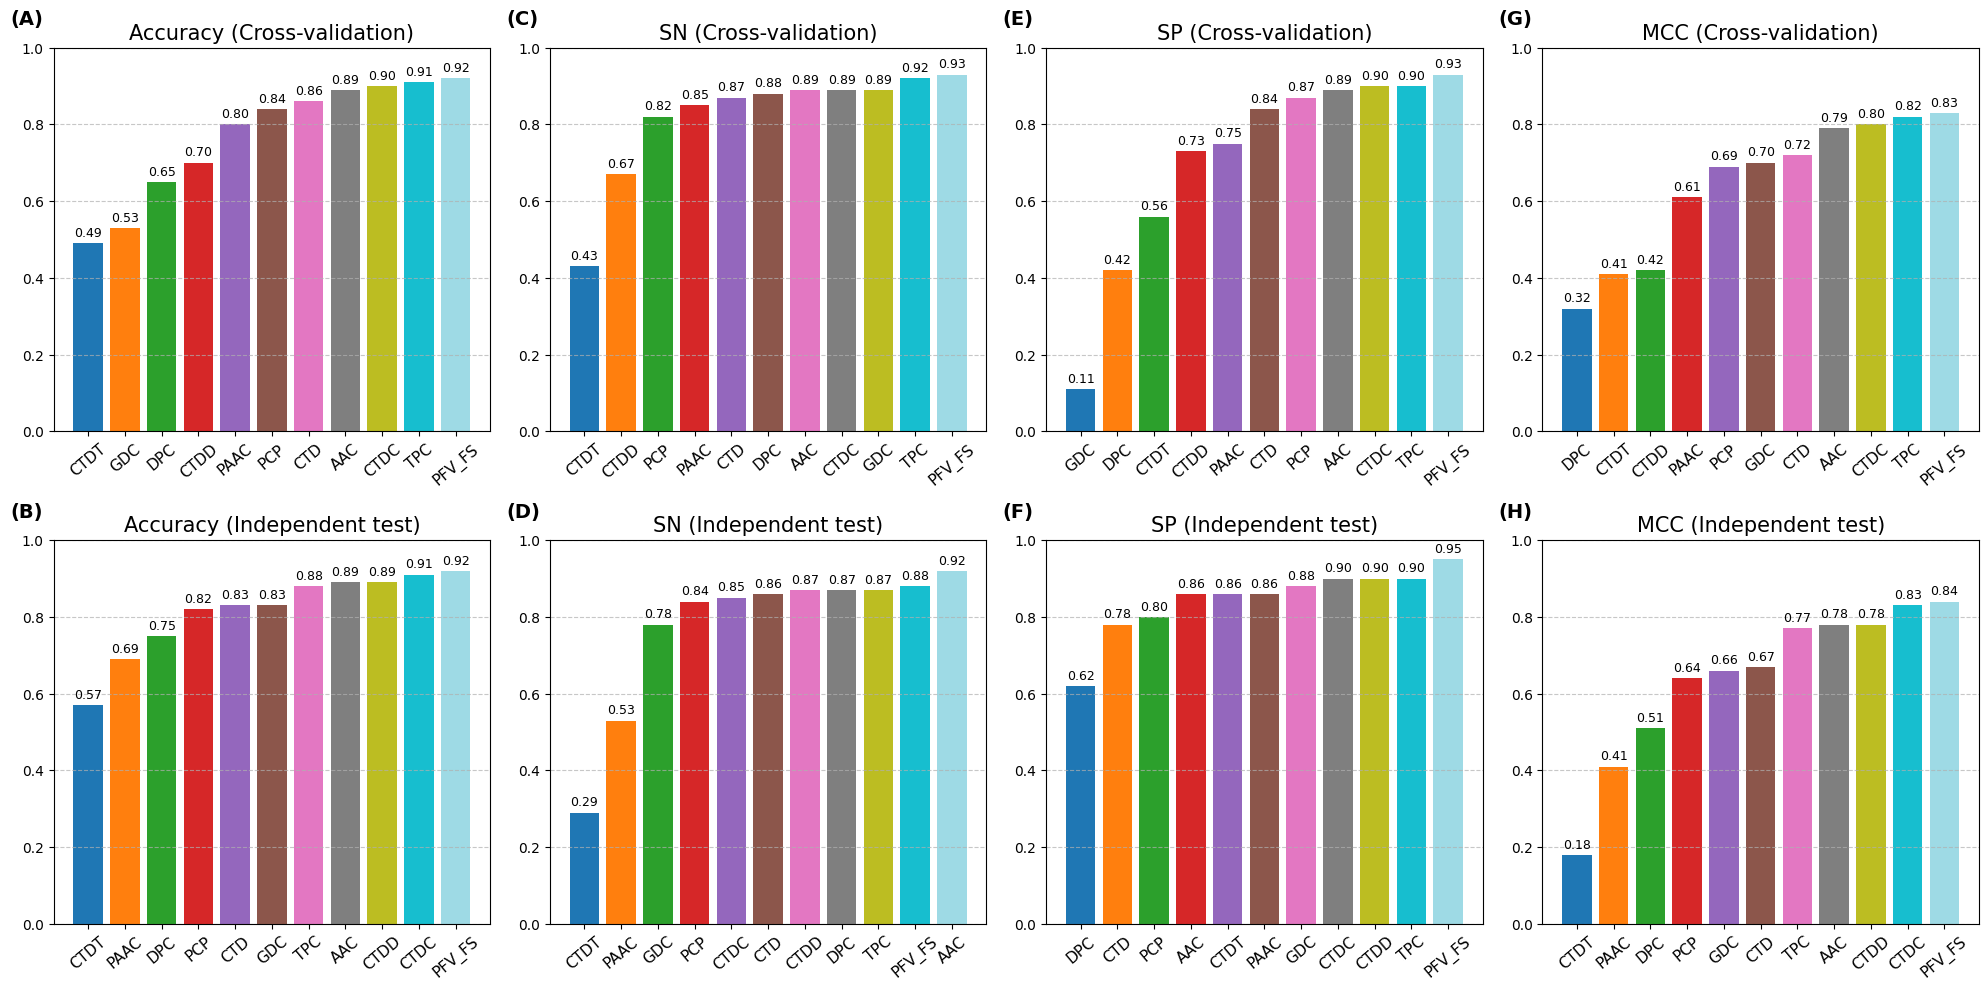

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Feature names
features = ['AAC', 'CTD', 'CTDC', 'CTDD', 'CTDT', 'DPC', 'GDC', 'PAAC', 'PCP', 'TPC', 'PFV_FS']
colors = plt.cm.get_cmap('tab20', len(features)).colors  # 11 unique colors

# Metrics for 5-fold cross-validation
cross_val = {
    'Accuracy': [0.89, 0.86, 0.90, 0.70, 0.49, 0.65, 0.53, 0.80, 0.84, 0.91, 0.92],
    'SN':       [0.89, 0.87, 0.89, 0.67, 0.43, 0.88, 0.89, 0.85, 0.82, 0.92, 0.93],
    'SP':       [0.89, 0.84, 0.90, 0.73, 0.56, 0.42, 0.11, 0.75, 0.87, 0.90, 0.93],
    'MCC':      [0.79, 0.72, 0.80, 0.42, 0.41, 0.32, 0.70, 0.61, 0.69, 0.82, 0.83]
}

# Metrics for independent test
indep_test = {
    'Accuracy': [0.89, 0.83, 0.91, 0.89, 0.57, 0.75, 0.83, 0.69, 0.82, 0.88, 0.92],
    'SN':       [0.92, 0.86, 0.85, 0.87, 0.29, 0.87, 0.78, 0.53, 0.84, 0.87, 0.88],
    'SP':       [0.86, 0.78, 0.90, 0.90, 0.86, 0.62, 0.88, 0.86, 0.80, 0.90, 0.95],
    'MCC':      [0.78, 0.67, 0.83, 0.78, 0.18, 0.51, 0.66, 0.41, 0.64, 0.77, 0.84]
}

# Plotting
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
metrics = ['Accuracy', 'SN', 'SP', 'MCC']
subplot_labels = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']
label_idx = 0

for i, metric in enumerate(metrics):
    # Cross-validation
    values_cv = cross_val[metric]
    zipped_cv = list(zip(features, values_cv))
    zipped_cv.sort(key=lambda x: x[1])
    sorted_features_cv, sorted_values_cv = zip(*zipped_cv)

    bars_cv = axs[0, i].bar(sorted_features_cv, sorted_values_cv, color=colors)
    axs[0, i].set_ylim([0, 1])
    axs[0, i].set_title(f"{metric} (Cross-validation)", fontsize=15)
    axs[0, i].tick_params(axis='x', rotation=40, labelsize=11)
    axs[0, i].grid(axis='y', linestyle='--', alpha=0.7)

    # 📍 Move label to top-left (adjusted position for no overlap)
    axs[0, i].text(-0.1, 1.05, subplot_labels[label_idx], transform=axs[0, i].transAxes,
                   fontsize=14, fontweight='bold', va='bottom', ha='left')
    label_idx += 1

    for bar, val in zip(bars_cv, sorted_values_cv):
        axs[0, i].text(bar.get_x() + bar.get_width() / 2, val + 0.01, f'{val:.2f}',
                       ha='center', va='bottom', fontsize=9)

    # Independent test
    values_indep = indep_test[metric]
    zipped_indep = list(zip(features, values_indep))
    zipped_indep.sort(key=lambda x: x[1])
    sorted_features_indep, sorted_values_indep = zip(*zipped_indep)

    bars_indep = axs[1, i].bar(sorted_features_indep, sorted_values_indep, color=colors)
    axs[1, i].set_ylim([0, 1])
    axs[1, i].set_title(f"{metric} (Independent test)", fontsize=15)
    axs[1, i].tick_params(axis='x', rotation=40, labelsize=11)
    axs[1, i].grid(axis='y', linestyle='--', alpha=0.7)

    # 📍 Move label to top-left (adjusted position for no overlap)
    axs[1, i].text(-0.1, 1.05, subplot_labels[label_idx], transform=axs[1, i].transAxes,
                   fontsize=14, fontweight='bold', va='bottom', ha='left')
    label_idx += 1

    for bar, val in zip(bars_indep, sorted_values_indep):
        axs[1, i].text(bar.get_x() + bar.get_width() / 2, val + 0.01, f'{val:.2f}',
                       ha='center', va='bottom', fontsize=9)

# Layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()
